# Econometric Models

In [1]:
#Importing Necessary Packages

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.stats as stats
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from statsmodels.miscmodels.ordinal_model import OrderedModel
from statsmodels.formula.api import logit
from pystout import pystout
from tabulate import tabulate
import latextable

In [2]:
def confint(data):
    ci = 1.96 * np.std(data) / np.sqrt(len(data)-1)
    return ci

# Risk Perceptions Models

In [3]:
#Loading dataframes
demographics = pd.read_csv('Demographics.csv')
exposure = pd.read_csv('Narrow_exposure.csv')
info = pd.read_csv('Information.csv')
social = pd.read_csv('SocialNetworks.csv')
climaterisk = pd.read_csv('ClimateRiskPerceptions.csv')
indperceptions = pd.read_csv('IndividualHazardPerceptions.csv')
livelihoodrisk = pd.read_csv('LivelihoodPerceptions.csv')
aspirations = pd.read_csv('Aspirations.csv')
factored_riskperceptions = pd.read_csv('RiskPerceptions_2FactorAnalysis.csv')



In [4]:
#Merging Datasets
risk_df = pd.DataFrame()

merge1 = pd.merge(demographics, exposure, on='HHID')
merge2 = pd.merge(merge1, info, on='HHID')
merge3 = pd.merge(merge2, social, on='HHID')
merge4 = pd.merge(merge3, climaterisk, on='HHID')
merge5 = pd.merge(merge4, indperceptions, on='HHID')
merge6 = pd.merge(merge5, livelihoodrisk, on='HHID')
merge7 = pd.merge(merge6, aspirations, on='HHID')
merge8 = pd.merge(merge7, factored_riskperceptions, on='HHID')
risk_df = merge8.dropna()
merge8

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_7223/3004864704.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge3 = pd.merge(merge2, social, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_7223/3004864704.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge5 = pd.merge(merge4, indperceptions, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_7223/3004864704.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge7 = pd.merge(merge6, aspirations, on='HHID')


,Unnamed: 0_x,HHID,IWTime,SN,Age_x,Gender_x,M_Status,Class,S_Name,Occupation,...,Money,Appliances,Vehicle,House,Land,FarmContinuity,ProsperousCommunity,Unnamed: 0,Flood_Factor,Withering_Factor
0,0,2301006,0:10,1,43,0,1,9,0,2,...,1,0,0,1,1,0,0,0,-0.868888,0.309921
1,1,2301007,0:10,1,55,1,1,3,0,5,...,0,0,0,1,1,0,1,1,-2.208492,-0.009408
2,2,2301013,0:06,1,49,1,1,0,0,6,...,1,0,0,1,1,0,0,2,-0.478208,-1.248082
3,3,2301016,0:15,1,55,1,1,0,0,5,...,1,0,1,1,1,0,1,3,-0.894176,0.366074
4,4,2301017,0:05,1,47,1,1,10,0,5,...,0,0,0,1,0,0,1,4,0.681594,-0.036422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,2611114,0:11,1,47,0,1,0,0,3,...,0,0,0,0,1,0,0,495,-0.767779,0.031169
496,496,2611115,0:10,1,36,1,1,5,0,5,...,1,0,1,1,1,0,1,496,0.454850,0.772555
497,497,2611117,0:09,1,44,1,1,0,0,5,...,0,1,0,1,1,0,0,497,-0.395936,-1.410073
498,498,2611118,0:04,1,56,1,1,0,0,5,...,1,0,0,0,1,0,0,498,0.587060,0.251305


In [5]:
#Testing
risk_perceptions = pd.DataFrame()
risk_perceptions = risk_df[['HHID', 'CompositeRisk']]

for col in risk_df.columns:
    if 'Riskiness' in col:
        risk_perceptions[col] = risk_df[col]
        
clean_risk = risk_perceptions.drop(['HHID'], axis=1)
clean_risk.corr()

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_7223/657767824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_perceptions[col] = risk_df[col]
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_7223/657767824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_perceptions[col] = risk_df[col]
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_7223/657767824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,CompositeRisk,Riskiness_CerealCrops,Riskiness_Non-CerealCrops,Riskiness_Fruit/Veg,Riskiness_LargeAnimal,Riskiness_SmallAnimal,Riskiness_Poultry,Riskiness_LocalMigrate,Riskiness_IntlMigrate,Riskiness_Business,Riskiness_Salary,Riskiness_Wage,Riskiness_Pension
CompositeRisk,1.000000,0.170650,0.220712,0.184138,0.226481,0.249449,0.136927,0.208489,0.209590,0.153699,0.104249,0.220646,0.080238
Riskiness_CerealCrops,0.170650,1.000000,0.522536,0.353631,0.346146,0.386909,0.301697,0.293304,0.292691,0.342066,0.229405,0.249229,0.102364
Riskiness_Non-CerealCrops,0.220712,0.522536,1.000000,0.470113,0.236280,0.334103,0.249758,0.226462,0.124539,0.180201,0.168132,0.298989,0.152761
Riskiness_Fruit/Veg,0.184138,0.353631,0.470113,1.000000,0.439124,0.465791,0.350956,0.324675,0.196353,0.304651,0.243167,0.355065,0.126317
Riskiness_LargeAnimal,0.226481,0.346146,0.236280,0.439124,1.000000,0.546543,0.356538,0.253945,0.241156,0.342190,0.319353,0.289418,0.058184
Riskiness_SmallAnimal,0.249449,0.386909,0.334103,0.465791,0.546543,1.000000,0.500542,0.332689,0.255881,0.339402,0.329384,0.363239,0.142408
Riskiness_Poultry,0.136927,0.301697,0.249758,0.350956,0.356538,0.500542,1.000000,0.203110,0.202166,0.288597,0.193850,0.202150,0.163130
Riskiness_LocalMigrate,0.208489,0.293304,0.226462,0.324675,0.253945,0.332689,0.203110,1.000000,0.399430,0.278232,0.302139,0.329311,0.120613
Riskiness_IntlMigrate,0.209590,0.292691,0.124539,0.196353,0.241156,0.255881,0.202166,0.399430,1.000000,0.338012,0.260177,0.201988,0.049180
Riskiness_Business,0.153699,0.342066,0.180201,0.304651,0.342190,0.339402,0.288597,0.278232,0.338012,1.000000,0.368889,0.165278,0.063263


In [6]:
dalit_df = risk_df.loc[risk_df['Dalit']==1]
nondalit_df = risk_df.loc[risk_df['Dalit'] == 0]
print(dalit_df['GroupIndex'].mean())

print(nondalit_df['GroupIndex'].mean())

stats.ttest_ind(a=nondalit_df['GroupIndex'], b=dalit_df['GroupIndex'])

-0.2979131101675171
0.04689818937847305


Ttest_indResult(statistic=2.7544365093237264, pvalue=0.006095324930856896)

# Influence of Info and Social Capital on Climate Risk Perceptions

In [7]:
y = risk_df['Risk_Norm']
x_1 = risk_df[['Gender_x', 'Age_x', 'Secondary_x', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'HazardIndex', 'SourceIndex', 'GroupIndex']]

             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Risk_Norm   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.672
Date:                Thu, 11 Jan 2024   Prob (F-statistic):             0.0767
Time:                        20:53:22   Log-Likelihood:                -195.27
No. Observations:                 498   AIC:                             414.5
Df Residuals:                     486   BIC:                             465.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3993      0.112      3.580      0.000       0.180       0.618
Gender_x                0.0001      0.039      0.004      0.997      -0.077       0.077
Age_x                   0.0001      0.002      0.088      0.930      -0.003       0.003
Secondary_x            -0.0125      0.041     -0.302      0.763      -0.094       0.069
Gurung-Magar-Tamang    -0.0264      0.054     -0.487      0.627      -0.133       0.080
Dalit                  -0.1310      0.053     -2.480      0.013      -0.235      -0.027
Newar                  -0.0729      0.125     -0.584      0.559      -0.318       0.172
Tharu-Darai-Kumal      -0.0008      0.042     -0.019      0.984      -0.083       0.082
Other                   0.0175      0.093      0.187      0.852      -0.166       0.201
HazardIndex             0.0394      0.017      2.296      0.022       0.006       0.073
SourceIndex            -0.0257      0.017     -1.485      0.138      -0.060       0.008
GroupIndex              0.0149      0.017      0.860      0.390      -0.019       0.049
==============================================================================
Omnibus:                       10.563   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.760
Skew:                          -0.359   Prob(JB):                      0.00461
Kurtosis:                       3.058   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Alternate Models

In [8]:
#Local vs National Sources

y = risk_df['CompositeRisk']
x_1 = risk_df[['Gender_x', 'Age_x', 'Secondary_x', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'HazardIndex', 'LocalIndex', 'NationalIndex', 'GroupIndex']]

             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
est = est.fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CompositeRisk   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.727
Date:                Thu, 11 Jan 2024   Prob (F-statistic):             0.0583
Time:                        20:53:24   Log-Likelihood:                 27.450
No. Observations:                 498   AIC:                            -28.90
Df Residuals:                     485   BIC:                             25.84
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2749      0.071      3.855      0.000       0.135       0.415
Gender_x               -0.0053      0.025     -0.210      0.834      -0.055       0.044
Age_x               -9.326e-05      0.001     -0.089      0.929      -0.002       0.002
Secondary_x            -0.0242      0.026     -0.915      0.361      -0.076       0.028
Gurung-Magar-Tamang    -0.0310      0.035     -0.893      0.372      -0.099       0.037
Dalit                  -0.0912      0.034     -2.697      0.007      -0.158      -0.025
Newar                  -0.0513      0.080     -0.643      0.521      -0.208       0.106
Tharu-Darai-Kumal      -0.0209      0.027     -0.780      0.436      -0.074       0.032
Other                   0.0055      0.060      0.092      0.927      -0.112       0.123
HazardIndex             0.0286      0.011      2.607      0.009       0.007       0.050
LocalIndex             -0.0147      0.012     -1.271      0.204      -0.037       0.008
NationalIndex          -0.0061      0.011     -0.529      0.597      -0.029       0.017
GroupIndex              0.0123      0.011      1.125      0.261      -0.009       0.034
==============================================================================
Omnibus:                        7.234   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                7.489
Skew:                          -0.230   Prob(JB):                       0.0237
Kurtosis:                       3.386   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#Public Sources

y = risk_df['Hail']
x_1 = risk_df[['Gender_x', 'Age_x', 'Secondary_x', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'HailExp', 'Professional', 'GroupIndex']]

             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Hail   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.292
Date:                Thu, 11 Jan 2024   Prob (F-statistic):              0.226
Time:                        21:59:47   Log-Likelihood:                -565.61
No. Observations:                 498   AIC:                             1155.
Df Residuals:                     486   BIC:                             1206.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0483      0.234     -0.206      0.837      -0.508       0.411
Gender_x               -0.1152      0.082     -1.403      0.161      -0.276       0.046
Age_x                   0.0005      0.003      0.138      0.890      -0.006       0.007
Secondary_x            -0.0590      0.087     -0.680      0.497      -0.229       0.111
Gurung-Magar-Tamang     0.0438      0.114      0.384      0.701      -0.180       0.268
Dalit                  -0.1423      0.111     -1.279      0.202      -0.361       0.076
Newar                   0.1036      0.262      0.395      0.693      -0.412       0.619
Tharu-Darai-Kumal       0.0321      0.088      0.367      0.714      -0.140       0.204
Other                   0.2518      0.195      1.290      0.198      -0.132       0.636
HailExp                 0.1047      0.056      1.856      0.064      -0.006       0.216
Professional           -0.0318      0.035     -0.903      0.367      -0.101       0.037
GroupIndex              0.0354      0.036      0.977      0.329      -0.036       0.107
==============================================================================
Omnibus:                      320.601   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.670
Skew:                           0.181   Prob(JB):                     8.05e-08
Kurtosis:                       1.799   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#Testing for individual information source effects

alternate_df = risk_df
infosources = ['Radio', 'Television', 'Newspapers', 'AgExtension', 'Veterinarian', 'MigrantLabor', 'OtherGov', 'LocalFriend', 'DistantFriend', 'Religious', 'Scientist', 'SocialMedia']

for info in infosources:
    alternate_df[info] = risk_df[info].gt(0).astype(float)
    
    

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_7223/3591537500.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alternate_df[info] = risk_df[info].gt(0).astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_7223/3591537500.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alternate_df[info] = risk_df[info].gt(0).astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_7223/3591537500.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [11]:
y = risk_df['CompositeRisk']
infosource = 'AgExtension'
x_1 = risk_df[['Gender_x', 'Age_x', 'Secondary_x', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'HazardIndex', infosource, 'GroupIndex']]

             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CompositeRisk   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.695
Date:                Thu, 11 Jan 2024   Prob (F-statistic):             0.0714
Time:                        20:53:32   Log-Likelihood:                 26.408
No. Observations:                 498   AIC:                            -28.82
Df Residuals:                     486   BIC:                             21.71
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2788      0.072      3.873      0.000       0.137       0.420
Gender_x               -0.0035      0.025     -0.141      0.888      -0.053       0.046
Age_x                -7.84e-05      0.001     -0.075      0.941      -0.002       0.002
Secondary_x            -0.0273      0.026     -1.032      0.303      -0.079       0.025
Gurung-Magar-Tamang    -0.0294      0.035     -0.846      0.398      -0.098       0.039
Dalit                  -0.0919      0.034     -2.710      0.007      -0.158      -0.025
Newar                  -0.0467      0.080     -0.585      0.559      -0.204       0.110
Tharu-Darai-Kumal      -0.0200      0.027     -0.745      0.456      -0.073       0.033
Other                   0.0098      0.060      0.164      0.869      -0.108       0.127
HazardIndex             0.0269      0.011      2.472      0.014       0.006       0.048
AgExtension            -0.0212      0.025     -0.834      0.404      -0.071       0.029
GroupIndex              0.0100      0.011      0.919      0.359      -0.011       0.031
==============================================================================
Omnibus:                        6.625   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.785
Skew:                          -0.219   Prob(JB):                       0.0336
Kurtosis:                       3.367   Cond. No.                         369.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#Specific Hazards
dv = 'Droughts'
y = risk_df[dv]
x_1 = risk_df[['Gender_x', 'Age_x', 'Secondary_x', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'DroughtExp', 'SourceIndex', 'GroupIndex']]

             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
est = est.fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Droughts   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.896
Date:                Thu, 11 Jan 2024   Prob (F-statistic):             0.0376
Time:                        21:08:54   Log-Likelihood:                -554.95
No. Observations:                 498   AIC:                             1134.
Df Residuals:                     486   BIC:                             1184.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5331      0.229      2.329      0.020       0.083       0.983
Gender_x               -0.0466      0.081     -0.577      0.564      -0.205       0.112
Age_x                  -0.0004      0.003     -0.115      0.909      -0.007       0.006
Secondary_x            -0.1489      0.085     -1.751      0.081      -0.316       0.018
Gurung-Magar-Tamang     0.0107      0.112      0.095      0.924      -0.209       0.230
Dalit                  -0.1211      0.108     -1.117      0.265      -0.334       0.092
Newar                  -0.2476      0.257     -0.963      0.336      -0.753       0.257
Tharu-Darai-Kumal      -0.0305      0.087     -0.352      0.725      -0.201       0.140
Other                   0.0783      0.191      0.410      0.682      -0.297       0.454
DroughtExp              0.0288      0.014      2.123      0.034       0.002       0.056
SourceIndex            -0.0873      0.035     -2.464      0.014      -0.157      -0.018
GroupIndex             -0.0220      0.036     -0.618      0.537      -0.092       0.048
==============================================================================
Omnibus:                       60.098   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.739
Skew:                          -0.896   Prob(JB):                     2.64e-16
Kurtosis:                       2.506   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#Specific Groups

y = risk_df['CompositeRisk']
#risk_df[groupsource + 'Membership'] = risk_df[groupsource].gt(0).astype(float)
x_1 = risk_df[['Gender_x', 'Age_x', 'Secondary_x', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'HazardIndex','SourceIndex','FarmingGroups']]             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CompositeRisk   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2.196
Date:                Thu, 11 Jan 2024   Prob (F-statistic):             0.0137
Time:                        20:53:45   Log-Likelihood:                 29.110
No. Observations:                 498   AIC:                            -34.22
Df Residuals:                     486   BIC:                             16.31
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2718      0.071      3.854      0.000       0.133       0.410
Gender_x               -0.0069      0.025     -0.278      0.781      -0.056       0.042
Age_x               -9.461e-05      0.001     -0.091      0.927      -0.002       0.002
Secondary_x            -0.0234      0.026     -0.893      0.372      -0.075       0.028
Gurung-Magar-Tamang    -0.0256      0.035     -0.738      0.461      -0.094       0.043
Dalit                  -0.0847      0.034     -2.506      0.013      -0.151      -0.018
Newar                  -0.0453      0.080     -0.569      0.570      -0.202       0.111
Tharu-Darai-Kumal      -0.0147      0.027     -0.550      0.582      -0.067       0.038
Other                   0.0074      0.059      0.125      0.901      -0.109       0.124
HazardIndex             0.0268      0.011      2.437      0.015       0.005       0.048
SourceIndex            -0.0206      0.011     -1.899      0.058      -0.042       0.001
FarmingGroups           0.0218      0.011      2.015      0.044       0.001       0.043
==============================================================================
Omnibus:                        7.311   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.438
Skew:                          -0.241   Prob(JB):                       0.0243
Kurtosis:                       3.355   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Influence of Overall Climate Risk Perception on Livelihood Risk

In [13]:
risk_df['CompositeRisk_tenths'] = risk_df['CompositeRisk'] * 10

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_6679/3052846398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_df['CompositeRisk_tenths'] = risk_df['CompositeRisk'] * 10


In [14]:
risk_df['CompositeRisk_tenths'].describe()

count    498.000000
mean       2.299142
std        2.340692
min       -6.593407
25%        0.858516
50%        2.376374
75%        3.846154
max        8.653846
Name: CompositeRisk_tenths, dtype: float64

In [15]:
predictedrisk_df = pd.DataFrame()
predictedrisk_df['HHID'] = risk_df['HHID']

In [16]:
#Perceptions Ordered Logit Model
mod_prob = OrderedModel(risk_df['Riskiness_IntlMigrate'],
                        risk_df[['Gender_x', 'Age_x', 'Secondary_x', 'CompositeRisk_tenths', 'SourceIndex', 'GroupIndex']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()




Optimization terminated successfully.
         Current function value: 0.578401
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OrderedModel Results                              
=================================================================================
Dep. Variable:     Riskiness_IntlMigrate   Log-Likelihood:                -288.04
Model:                      OrderedModel   AIC:                             592.1
Method:               Maximum Likelihood   BIC:                             625.8
Date:                   Wed, 10 Jan 2024                                         
Time:                           16:01:30                                         
No. Observations:                    498                                         
Df Residuals:                        490                                         
Df Model:                              8                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Gender_x                -0.4201      0.271     -1.553      0.121      -0.950       0.110
Age_x                   -0.0031      0.011     -0.292      0.770      -0.024       0.018
Secondary_x              0.2957      0.267      1.106      0.269      -0.228       0.820
CompositeRisk_tenths     0.2415      0.050      4.875      0.000       0.144       0.339
SourceIndex             -0.0935      0.111     -0.843      0.399      -0.311       0.124
GroupIndex              -0.2066      0.114     -1.809      0.071      -0.431       0.017
1/2                     -3.3691      0.709     -4.753      0.000      -4.758      -1.980
2/3                      0.8286      0.111      7.494      0.000       0.612       1.045
========================================================================================
"""

In [17]:
#Predicted probabilities

predicted_risk = res_log.predict(risk_df[['Gender_x', 'Age_x', 'Secondary_x', 'CompositeRisk_tenths', 'SourceIndex', 'GroupIndex']], offset = 1, which="linpred")

predictedrisk_df['PredRisk_IntlMigrate'] = predicted_risk.values

predictedrisk_df


,HHID,PredRisk_IntlMigrate
0,2301006,1.260191
2,2301013,0.836350
3,2301016,1.207111
4,2301017,0.883489
5,2301021,0.879717
...,...,...
495,2611114,1.709926
496,2611115,1.987249
497,2611117,0.221591
498,2611118,0.930234


In [18]:
#Coefficient Plot
err_series = res_log.params - res_log.conf_int()[0]
coef_df = pd.DataFrame({'coef': res_log.params.values[:-2],
                        'err': err_series.values[:-2],
                        'varname': err_series.index.values[:-2],
                       })

coef_df['varname'] = ['Female', 'Age', 'Secondary School', 'Climate Risk', 'Info Sources', 'Social Groups']

coef_df['odds'] = np.exp(coef_df['coef'])

coef_df['odds_err_max'] = np.exp(coef_df['coef'] + coef_df['err']) - coef_df['odds']
coef_df['odds_err_min'] = coef_df['odds'] - np.exp(coef_df['coef'] - coef_df['err'])

coef_df


,coef,err,varname,odds,odds_err_max,odds_err_min
0,-0.420081,0.530317,Female,0.656994,0.459549,0.270407
1,-0.003094,0.020754,Age,0.996910,0.020906,0.020477
2,0.295740,0.523956,Secondary School,1.344120,0.925688,0.548168
3,0.241493,0.097099,Climate Risk,1.273149,0.129823,0.117810
4,-0.093498,0.217486,Info Sources,0.910740,0.221262,0.178014
5,-0.206611,0.223901,Social Groups,0.813336,0.204104,0.163160


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_6679/3856806647.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


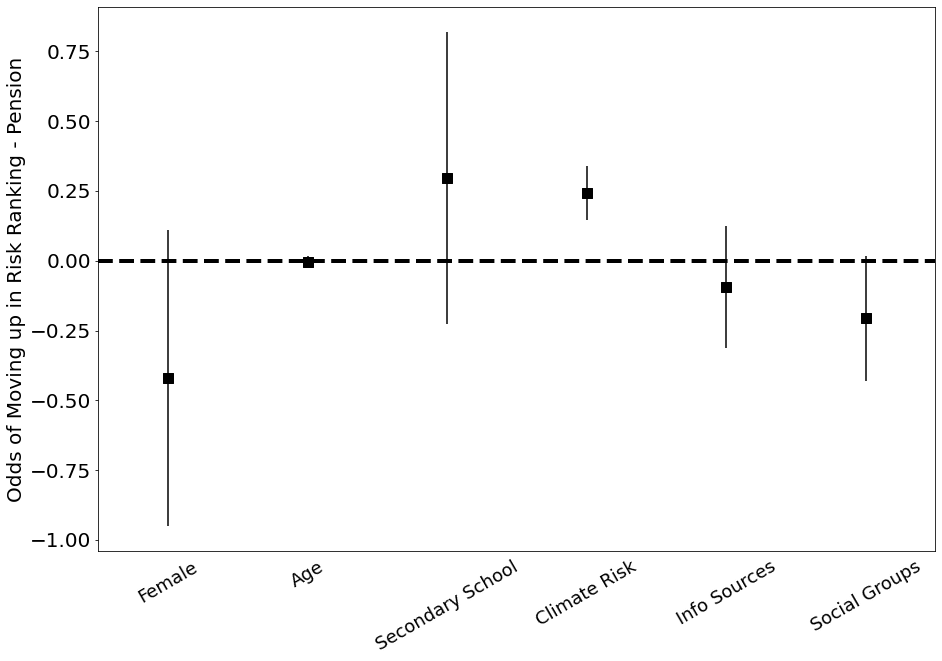

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
y_err = [coef_df['odds_err_min'], coef_df['odds_err_max']]


coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)


ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')

ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(coef_df['varname'], 
                       rotation=30, fontsize=18)

ax.set_ylabel('Odds of Moving up in Risk Ranking - Pension', fontsize=20)

plt.yticks(fontsize=20)
plt.show()
#plt.savefig('LivelihoodCoefPlotPension.png', bbox_inches='tight')


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_6679/2697877910.py:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(chart_df.shape[0]),


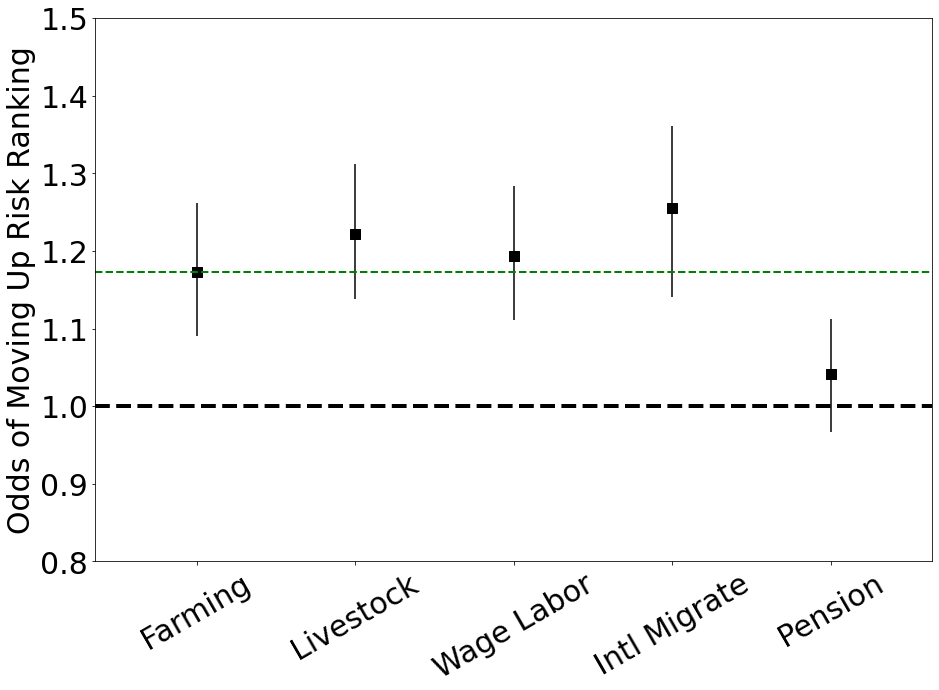

In [20]:
#Bar Chart Comparing Climate Effect on Livelihood Risk

chart_df = pd.DataFrame()

chart_df['Livelihood'] = ['Farming', 'Livestock', 'Wage Labor', 'Intl Migrate', 'Pension']

chart_df['Odds'] = [1.173, 1.222, 1.194 ,1.255, 1.042]

chart_df['ErrMin'] = [0.0825, 0.08354, 0.0833, 0.115, 0.0749]

chart_df['ErrMax'] = [0.0887, 0.0897, 0.0895, 0.1052, 0.0699]

y_err = [chart_df['ErrMin'], chart_df['ErrMax']]

fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(chart_df['Livelihood'], chart_df['Odds'], yerr = y_err, color='none')
ax.scatter(x=pd.np.arange(chart_df.shape[0]), 
           marker='s', s=120, 
           y=chart_df['Odds'], color='black')


ax.set_ylabel('Odds of Moving Up Risk Ranking', fontsize=30)
ax.axhline(y=1, linestyle='--', color='black', linewidth=4)
ax.axhline(y=chart_df['Odds'][0], linestyle='--', color='green', linewidth=2)
ax.set_ylim([0.8, 1.5])
plt.xticks(fontsize=30, rotation=30)
plt.yticks(fontsize=30)

#plt.show()

plt.savefig('LivelihoodRiskCoefComparison_withline.png', bbox_inches='tight')


In [21]:
#Saving as a Latex table
table = res_log.summary().tables[1]
print(tabulate(table, headers='firstrow', tablefmt='latex'))
print('\nTexttable Latex:')

\begin{tabular}{lllllll}
\hline
                      & coef    & std err   & z      & P\ensuremath{>}|z|   & [0.025   & 0.975]   \\
\hline
 Gender\_x             & -0.4201 & 0.271     & -1.553 & 0.121   & -0.950   & 0.110    \\
 Age\_x                & -0.0031 & 0.011     & -0.292 & 0.770   & -0.024   & 0.018    \\
 Secondary\_x          & 0.2957  & 0.267     & 1.106  & 0.269   & -0.228   & 0.820    \\
 CompositeRisk\_tenths & 0.2415  & 0.050     & 4.875  & 0.000   & 0.144    & 0.339    \\
 SourceIndex          & -0.0935 & 0.111     & -0.843 & 0.399   & -0.311   & 0.124    \\
 GroupIndex           & -0.2066 & 0.114     & -1.809 & 0.071   & -0.431   & 0.017    \\
 1/2                  & -3.3691 & 0.709     & -4.753 & 0.000   & -4.758   & -1.980   \\
 2/3                  & 0.8286  & 0.111     & 7.494  & 0.000   & 0.612    & 1.045    \\
\hline
\end{tabular}

Texttable Latex:


In [22]:
#Version with Caste controls
mod_prob = OrderedModel(risk_df['Riskiness_IntlMigrate'],
                        risk_df[['Gender', 'Age', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'CompositeRisk', 'SourceIndex', 'GroupIndex']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()


KeyError: "['Gender', 'Age', 'Secondary'] not in index"

In [23]:
#Saving as a Latex table
table = res_log.summary().tables[1]
print(tabulate(table, headers='firstrow', tablefmt='latex'))
print('\nTexttable Latex:')


\begin{tabular}{lllllll}
\hline
                      & coef    & std err   & z      & P\ensuremath{>}|z|   & [0.025   & 0.975]   \\
\hline
 Gender\_x             & -0.4201 & 0.271     & -1.553 & 0.121   & -0.950   & 0.110    \\
 Age\_x                & -0.0031 & 0.011     & -0.292 & 0.770   & -0.024   & 0.018    \\
 Secondary\_x          & 0.2957  & 0.267     & 1.106  & 0.269   & -0.228   & 0.820    \\
 CompositeRisk\_tenths & 0.2415  & 0.050     & 4.875  & 0.000   & 0.144    & 0.339    \\
 SourceIndex          & -0.0935 & 0.111     & -0.843 & 0.399   & -0.311   & 0.124    \\
 GroupIndex           & -0.2066 & 0.114     & -1.809 & 0.071   & -0.431   & 0.017    \\
 1/2                  & -3.3691 & 0.709     & -4.753 & 0.000   & -4.758   & -1.980   \\
 2/3                  & 0.8286  & 0.111     & 7.494  & 0.000   & 0.612    & 1.045    \\
\hline
\end{tabular}

Texttable Latex:


## Influence of Different Climate Factors on Livelihood Risk

In [24]:
#Perceptions Ordered Logit Model
mod_prob = OrderedModel(risk_df['Riskiness_Pension'],
                        risk_df[['Gender_x', 'Age_x', 'Secondary_x', 'Droughts', 'Floods', 'Pests', 'Groundwater', 'Heat', 'Frost', 'Hail']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()


Optimization terminated successfully.
         Current function value: 0.882562
         Iterations: 43
         Function evaluations: 49
         Gradient evaluations: 49


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:      Riskiness_Pension   Log-Likelihood:                -439.52
Model:                   OrderedModel   AIC:                             903.0
Method:            Maximum Likelihood   BIC:                             953.6
Date:                Mon, 12 Jun 2023                                         
Time:                        21:21:43                                         
No. Observations:                 498                                         
Df Residuals:                     486                                         
Df Model:                          12                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender_x        0.3665      0.216      1.699      0.089      -0.056       0.789
Age_x          -0.0008      0.009     -0.089      0.929      -0.018       0.016
Secondary_x    -0.0092      0.214     -0.043      0.966      -0.429       0.411
Droughts        0.2130      0.128      1.668      0.095      -0.037       0.463
Floods          0.2925      0.141      2.070      0.038       0.016       0.569
Pests           0.2141      0.213      1.005      0.315      -0.203       0.631
Groundwater     0.0795      0.118      0.671      0.502      -0.153       0.312
Heat           -0.1591      0.124     -1.278      0.201      -0.403       0.085
Frost           0.1053      0.137      0.769      0.442      -0.163       0.374
Hail            0.0514      0.123      0.419      0.675      -0.189       0.292
1/2             1.0618      0.559      1.900      0.057      -0.033       2.157
2/3             0.5744      0.078      7.341      0.000       0.421       0.728
===============================================================================
"""

In [16]:
#Saving as a Latex table
table = res_log.summary().tables[1]
print(tabulate(table, headers='firstrow', tablefmt='latex'))
print('\nTexttable Latex:')

\begin{tabular}{lllllll}
\hline
             & coef    & std err   & z      & P\ensuremath{>}|z|   & [0.025   & 0.975]   \\
\hline
 Gender      & 0.3665  & 0.216     & 1.699  & 0.089   & -0.056   & 0.789    \\
 Age         & -0.0008 & 0.009     & -0.089 & 0.929   & -0.018   & 0.016    \\
 Secondary   & -0.0092 & 0.214     & -0.043 & 0.966   & -0.429   & 0.411    \\
 Droughts    & 0.2130  & 0.128     & 1.668  & 0.095   & -0.037   & 0.463    \\
 Floods      & 0.2925  & 0.141     & 2.070  & 0.038   & 0.016    & 0.569    \\
 Pests       & 0.2141  & 0.213     & 1.005  & 0.315   & -0.203   & 0.631    \\
 Groundwater & 0.0795  & 0.118     & 0.671  & 0.502   & -0.153   & 0.312    \\
 Heat        & -0.1591 & 0.124     & -1.278 & 0.201   & -0.403   & 0.085    \\
 Frost       & 0.1053  & 0.137     & 0.769  & 0.442   & -0.163   & 0.374    \\
 Hail        & 0.0514  & 0.123     & 0.419  & 0.675   & -0.189   & 0.292    \\
 1/2         & 1.0618  & 0.559     & 1.900  & 0.057   & -0.033   & 2.157    \\


## With Caste Controls

In [17]:
#Perceptions Ordered Logit Model
mod_prob = OrderedModel(risk_df['Riskiness_CerealCrops'],
                        risk_df[['Gender', 'Age', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'Droughts', 'Floods', 'Pests', 'Groundwater', 'Heat', 'Frost', 'Hail']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()


Optimization terminated successfully.
         Current function value: 0.802693
         Iterations: 66
         Function evaluations: 71
         Gradient evaluations: 71


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OrderedModel Results                              
=================================================================================
Dep. Variable:     Riskiness_CerealCrops   Log-Likelihood:                -399.74
Model:                      OrderedModel   AIC:                             833.5
Method:               Maximum Likelihood   BIC:                             905.1
Date:                   Wed, 15 Feb 2023                                         
Time:                           17:37:23                                         
No. Observations:                    498                                         
Df Residuals:                        481                                         
Df Model:                             17                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Gender                 -0.0477      0.226     -0.211      0.833      -0.490       0.395
Age                    -0.0033      0.009     -0.362      0.717      -0.021       0.015
Secondary               0.2539      0.232      1.095      0.273      -0.200       0.708
Gurung-Magar-Tamang     0.2261      0.324      0.698      0.485      -0.409       0.861
Dalit                  -0.1068      0.296     -0.361      0.718      -0.687       0.474
Newar                   0.2056      0.726      0.283      0.777      -1.217       1.628
Tharu-Darai-Kumal      -0.2065      0.239     -0.863      0.388      -0.675       0.262
Other                  -0.5604      0.490     -1.143      0.253      -1.521       0.401
Droughts                0.2976      0.126      2.369      0.018       0.051       0.544
Floods                  0.1036      0.135      0.770      0.441      -0.160       0.367
Pests                   0.4012      0.200      2.005      0.045       0.009       0.793
Groundwater            -0.0796      0.120     -0.665      0.506      -0.314       0.155
Heat                    0.1149      0.126      0.914      0.361      -0.131       0.361
Frost                   0.0206      0.138      0.149      0.881      -0.250       0.291
Hail                    0.3375      0.128      2.631      0.009       0.086       0.589
1/2                    -2.4946      0.663     -3.764      0.000      -3.793      -1.196
2/3                     0.8803      0.078     11.314      0.000       0.728       1.033
=======================================================================================
"""

# Adaptation Strategies Model

In [18]:
#Loading dataframes
demographics = pd.read_csv('Demographics.csv')
info = pd.read_csv('Information.csv')
social = pd.read_csv('SocialNetworks.csv')
climaterisk = pd.read_csv('ClimateRiskPerceptions.csv')
livelihoodrisk = pd.read_csv('LivelihoodPerceptions.csv')
adaptation = pd.read_csv('AdaptationStrategies.csv')
indperceptions = pd.read_csv('IndividualHazardPerceptions.csv')


In [19]:
#Merging datasets
adaptation_df = pd.DataFrame()

merge1 = pd.merge(demographics, info, on='HHID')
merge2 = pd.merge(merge1, social, on='HHID')
merge3 = pd.merge(merge2, climaterisk, on='HHID')
merge4 = pd.merge(merge3, livelihoodrisk, on='HHID')
merge5 = pd.merge(merge4, adaptation, on='HHID')
merge6 = pd.merge(merge5, indperceptions, on='HHID')

adaptation_df = merge6.dropna()
adaptation_df

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_27103/185580249.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge3 = pd.merge(merge2, climaterisk, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_27103/185580249.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge5 = pd.merge(merge4, adaptation, on='HHID')


,Unnamed: 0_x,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,...,FinancialStrategies,LivelihoodStrategies,Unnamed: 0,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail
0,2,2301006,0:10,1,43,0,1,9,0,2,...,0,0,0,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0
2,9,2301013,0:06,1,49,1,1,0,0,6,...,0,0,2,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0
3,11,2301016,0:15,1,55,1,1,0,0,5,...,0,0,3,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,22,2301017,0:05,1,47,1,1,10,0,5,...,0,0,4,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
5,26,2301021,0:10,1,65,0,1,10,0,5,...,0,0,5,1.0,0.0,-1.0,-1.0,1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2360,2611114,0:11,1,47,0,1,0,0,3,...,0,0,495,1.0,0.0,-1.0,1.0,0.0,1.0,1.0
496,2367,2611115,0:10,1,36,1,1,5,0,5,...,0,1,496,1.0,1.0,-1.0,1.0,1.0,1.0,1.0
497,2372,2611117,0:09,1,44,1,1,0,0,5,...,1,0,497,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0
498,2376,2611118,0:04,1,56,1,1,0,0,5,...,0,0,498,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0


## Influence of Climate Risk Perception, Info & Social Capital on Adaptation Strategies

In [20]:
#Perceptions Ordered Logit Model
mod_prob = OrderedModel(adaptation_df['LivelihoodStrategies'],
                        adaptation_df[['Gender', 'Age', 'Secondary', 'CompositeRisk', 'Riskiness_CerealCrops', 'Riskiness_Fruit/Veg', 'Riskiness_IntlMigrate', 'Riskiness_Wage', 'SourceIndex', 'GroupIndex']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 0.443118
         Iterations: 57
         Function evaluations: 61
         Gradient evaluations: 61


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OrderedModel Results                              
================================================================================
Dep. Variable:     LivelihoodStrategies   Log-Likelihood:                -220.67
Model:                     OrderedModel   AIC:                             463.3
Method:              Maximum Likelihood   BIC:                             509.7
Date:                  Wed, 15 Feb 2023                                         
Time:                          17:37:30                                         
No. Observations:                   498                                         
Df Residuals:                       487                                         
Df Model:                            11                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Gender                    0.0868      0.285      0.305      0.761      -0.472       0.646
Age                      -0.0144      0.012     -1.235      0.217      -0.037       0.008
Secondary                 0.0993      0.290      0.342      0.732      -0.469       0.668
CompositeRisk            -0.1023      0.488     -0.210      0.834      -1.058       0.853
Riskiness_CerealCrops    -0.0360      0.216     -0.166      0.868      -0.460       0.388
Riskiness_Fruit/Veg      -0.3292      0.191     -1.721      0.085      -0.704       0.046
Riskiness_IntlMigrate    -0.0757      0.245     -0.309      0.757      -0.556       0.404
Riskiness_Wage           -0.2160      0.207     -1.043      0.297      -0.622       0.190
SourceIndex               0.2427      0.120      2.016      0.044       0.007       0.479
GroupIndex               -0.0665      0.126     -0.528      0.597      -0.313       0.180
0/1                      -0.5463      1.054     -0.518      0.604      -2.612       1.520
=========================================================================================
"""

In [21]:
#Saving as a Latex table
table = res_log.summary().tables[1]
print(tabulate(table, headers='firstrow', tablefmt='latex'))

\begin{tabular}{lllllll}
\hline
                       & coef    & std err   & z      & P\ensuremath{>}|z|   & [0.025   & 0.975]   \\
\hline
 Gender                & 0.0868  & 0.285     & 0.305  & 0.761   & -0.472   & 0.646    \\
 Age                   & -0.0144 & 0.012     & -1.235 & 0.217   & -0.037   & 0.008    \\
 Secondary             & 0.0993  & 0.290     & 0.342  & 0.732   & -0.469   & 0.668    \\
 CompositeRisk         & -0.1023 & 0.488     & -0.210 & 0.834   & -1.058   & 0.853    \\
 Riskiness\_CerealCrops & -0.0360 & 0.216     & -0.166 & 0.868   & -0.460   & 0.388    \\
 Riskiness\_Fruit/Veg   & -0.3292 & 0.191     & -1.721 & 0.085   & -0.704   & 0.046    \\
 Riskiness\_IntlMigrate & -0.0757 & 0.245     & -0.309 & 0.757   & -0.556   & 0.404    \\
 Riskiness\_Wage        & -0.2160 & 0.207     & -1.043 & 0.297   & -0.622   & 0.190    \\
 SourceIndex           & 0.2427  & 0.120     & 2.016  & 0.044   & 0.007    & 0.479    \\
 GroupIndex            & -0.0665 & 0.126     & -0.528 

## Effect of Individual Climate Risk Perceptions

In [22]:
#Perceptions Ordered Logit Model
mod_prob = OrderedModel(adaptation_df['FarmStrategies'],
                        adaptation_df[['Gender', 'Age', 'Secondary', 'Droughts', 'Floods', 'Pests', 'Groundwater', 'Heat', 'Frost', 'Hail','Riskiness_Fruit/Veg', 'Riskiness_Wage', 'SourceIndex', 'GroupIndex']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 0.444172
         Iterations: 55
         Function evaluations: 60
         Gradient evaluations: 60


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:         FarmStrategies   Log-Likelihood:                -221.20
Model:                   OrderedModel   AIC:                             472.4
Method:            Maximum Likelihood   BIC:                             535.6
Date:                Wed, 15 Feb 2023                                         
Time:                        17:37:34                                         
No. Observations:                 498                                         
Df Residuals:                     483                                         
Df Model:                          15                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Gender                 -0.4300      0.297     -1.447      0.148      -1.012       0.152
Age                    -0.0114      0.012     -0.945      0.345      -0.035       0.012
Secondary              -0.6520      0.306     -2.131      0.033      -1.252      -0.052
Droughts                0.1116      0.170      0.656      0.512      -0.222       0.445
Floods                 -0.1072      0.183     -0.586      0.558      -0.466       0.251
Pests                   0.1021      0.253      0.403      0.687      -0.394       0.599
Groundwater            -0.0339      0.155     -0.218      0.827      -0.338       0.270
Heat                    0.0237      0.166      0.143      0.886      -0.301       0.348
Frost                   0.0527      0.183      0.287      0.774      -0.307       0.412
Hail                   -0.2103      0.162     -1.295      0.195      -0.529       0.108
Riskiness_Fruit/Veg    -0.3172      0.203     -1.561      0.119      -0.715       0.081
Riskiness_Wage         -0.1001      0.227     -0.442      0.659      -0.544       0.344
SourceIndex             0.4018      0.150      2.683      0.007       0.108       0.695
GroupIndex              0.0887      0.132      0.674      0.500      -0.169       0.347
0/1                    -3.6515      1.017     -3.592      0.000      -5.644      -1.659
=======================================================================================
"""

# Effect of Climate Risk on Annual Income Proportion

In [24]:
#Loading dataframes
demographics = pd.read_csv('Demographics.csv')
info = pd.read_csv('Information.csv')
social = pd.read_csv('SocialNetworks.csv')
climaterisk = pd.read_csv('ClimateRiskPerceptions.csv')
livelihoodrisk = pd.read_csv('LivelihoodPerceptions.csv')
adaptation = pd.read_csv('AdaptationStrategies.csv')
indperceptions = pd.read_csv('IndividualHazardPerceptions.csv')
exposure = pd.read_csv('AnnualExposure.csv')
incomes = pd.read_csv('IncomeBlocks.csv')
climate = pd.read_csv('ClimateData.csv')
riskpref = pd.read_csv('RiskPreferences.csv')
aspirations = pd.read_csv('Aspirations.csv')
factored_riskperceptions = pd.read_csv('RiskPerceptions_2FactorAnalysis.csv')



In [25]:
#Merging datasets
income_df = pd.DataFrame()

merge1 = pd.merge(demographics, info, on='HHID')
merge2 = pd.merge(merge1, social, on='HHID')
merge3 = pd.merge(merge2, climaterisk, on='HHID')
merge4 = pd.merge(merge3, livelihoodrisk, on='HHID')
merge5 = pd.merge(merge4, incomes, on='HHID')
merge6 = pd.merge(merge5, climate, on='Year')
merge7 = pd.merge(merge6, indperceptions, on='HHID')
merge8 = pd.merge(merge7, exposure, on=['HHID','Year'])
merge9 = pd.merge(merge8, riskpref, on='HHID')
merge10 = pd.merge(merge9, aspirations, on='HHID')
merge11 = pd.merge(merge10, factored_riskperceptions, on='HHID')
climate_df = merge11.dropna()

climate_df

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_6679/1811034523.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge3 = pd.merge(merge2, climaterisk, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_6679/1811034523.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge5 = pd.merge(merge4, incomes, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_6679/1811034523.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge7 = pd.merge(merge6, indperceptions, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_6679/1811034523.py:12: FutureWarning: Passing 'suffixes' which cause

,Unnamed: 0_x,HHID,IWTime,SN,Age_x,Gender_x,M_Status,Class,S_Name,Occupation,...,Money,Appliances,Vehicle,House,Land,FarmContinuity,ProsperousCommunity,Unnamed: 0_y,Flood_Factor,Withering_Factor
0,0,2301006,0:10,1,43,0,1,9,0,2,...,1,0,0,1,1,0,0,0,-0.868888,0.309921
1,0,2301006,0:10,1,43,0,1,9,0,2,...,1,0,0,1,1,0,0,0,-0.868888,0.309921
2,0,2301006,0:10,1,43,0,1,9,0,2,...,1,0,0,1,1,0,0,0,-0.868888,0.309921
3,0,2301006,0:10,1,43,0,1,9,0,2,...,1,0,0,1,1,0,0,0,-0.868888,0.309921
4,0,2301006,0:10,1,43,0,1,9,0,2,...,1,0,0,1,1,0,0,0,-0.868888,0.309921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,499,2611119,0:24,1,73,0,1,0,0,5,...,1,1,1,1,1,0,1,499,0.717950,-0.251292
3496,499,2611119,0:24,1,73,0,1,0,0,5,...,1,1,1,1,1,0,1,499,0.717950,-0.251292
3497,499,2611119,0:24,1,73,0,1,0,0,5,...,1,1,1,1,1,0,1,499,0.717950,-0.251292
3498,499,2611119,0:24,1,73,0,1,0,0,5,...,1,1,1,1,1,0,1,499,0.717950,-0.251292


In [26]:
climate_df['RiskSeek'] = climate_df['RiskSeek'].astype(float)

climate_df['Age_x'].describe()
climate_df['Older'] = climate_df['Age_x'] > 43
climate_df['Older'] = climate_df['Older'].astype(int)
climate_df['Older'].describe()


climate_df['District'] = climate_df['HHID'].astype(str).str[:2]

print(climate_df['District'])

0       23
1       23
2       23
3       23
4       23
        ..
3495    26
3496    26
3497    26
3498    26
3499    26
Name: District, Length: 3427, dtype: object


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_6679/85249582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_df['RiskSeek'] = climate_df['RiskSeek'].astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_6679/85249582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_df['Older'] = climate_df['Age_x'] > 43
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_6679/85249582.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [27]:
climate_df['IncomeQuart'] = pd.qcut(climate_df['Annual Income'], 4, labels=False)
climate_df

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_6679/2538626306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_df['IncomeQuart'] = pd.qcut(climate_df['Annual Income'], 4, labels=False)


,Unnamed: 0_x,HHID,IWTime,SN,Age_x,Gender_x,M_Status,Class,S_Name,Occupation,...,House,Land,FarmContinuity,ProsperousCommunity,Unnamed: 0_y,Flood_Factor,Withering_Factor,Older,District,IncomeQuart
0,0,2301006,0:10,1,43,0,1,9,0,2,...,1,1,0,0,0,-0.868888,0.309921,0,23,3
1,0,2301006,0:10,1,43,0,1,9,0,2,...,1,1,0,0,0,-0.868888,0.309921,0,23,3
2,0,2301006,0:10,1,43,0,1,9,0,2,...,1,1,0,0,0,-0.868888,0.309921,0,23,3
3,0,2301006,0:10,1,43,0,1,9,0,2,...,1,1,0,0,0,-0.868888,0.309921,0,23,3
4,0,2301006,0:10,1,43,0,1,9,0,2,...,1,1,0,0,0,-0.868888,0.309921,0,23,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,499,2611119,0:24,1,73,0,1,0,0,5,...,1,1,0,1,499,0.717950,-0.251292,1,26,3
3496,499,2611119,0:24,1,73,0,1,0,0,5,...,1,1,0,1,499,0.717950,-0.251292,1,26,3
3497,499,2611119,0:24,1,73,0,1,0,0,5,...,1,1,0,1,499,0.717950,-0.251292,1,26,3
3498,499,2611119,0:24,1,73,0,1,0,0,5,...,1,1,0,1,499,0.717950,-0.251292,1,26,3


In [29]:
#Dataframe with Standardized variables
standardized_df = climate_df[['HHID', 'Gender_x', 'Age_x', 'Secondary_x', 'CompositeRisk', 'GroupIndex', 'SourceIndex', 'FloodExp', 'DroughtExp', 'Year', 'Farm_Prop', 'Remittances_Prop', 'Off-Farm Employment_Prop', 'Livestock_Prop']]
    
#for col in standardized_df.columns[1:-5]:
    #standardized_df[col] = (standardized_df[col] - standardized_df[col].mean()) / np.std(standardized_df[col])

standardized_variables = ['Age_x', 'CompositeRisk', 'GroupIndex', 'SourceIndex']   

for item in standardized_variables:
    standardized_df[item] = (standardized_df[item] - standardized_df[item].mean()) / np.std(standardized_df[item])
    


standardized_df

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_6679/1084054255.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standardized_df[item] = (standardized_df[item] - standardized_df[item].mean()) / np.std(standardized_df[item])


,HHID,Gender_x,Age_x,Secondary_x,CompositeRisk,GroupIndex,SourceIndex,FloodExp,DroughtExp,Year,Farm_Prop,Remittances_Prop,Off-Farm Employment_Prop,Livestock_Prop
0,2301006,0,-0.151071,1,-0.157671,1.547317,0.483751,0.0,0.0,72,0.064935,0.000000,0.311688,0.311688
1,2301006,0,-0.151071,1,-0.157671,1.547317,0.483751,0.0,0.0,73,0.088889,0.000000,0.000000,0.498413
2,2301006,0,-0.151071,1,-0.157671,1.547317,0.483751,0.0,0.0,74,0.000000,0.000000,0.222222,0.000000
3,2301006,0,-0.151071,1,-0.157671,1.547317,0.483751,0.0,0.0,75,0.000000,0.000000,0.046729,0.000000
4,2301006,0,-0.151071,1,-0.157671,1.547317,0.483751,0.0,0.0,76,0.000000,0.000000,0.045872,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2611119,0,2.139057,0,-0.204594,0.605627,0.944128,0.0,0.0,74,0.030466,0.430108,0.000000,0.526523
3496,2611119,0,2.139057,0,-0.204594,0.605627,0.944128,0.0,0.0,75,0.034014,0.442177,0.000000,0.499320
3497,2611119,0,2.139057,0,-0.204594,0.605627,0.944128,0.0,0.0,76,0.077190,0.849093,0.000000,0.018140
3498,2611119,0,2.139057,0,-0.204594,0.605627,0.944128,1.0,0.0,77,0.024375,0.914077,0.000000,0.017672


In [48]:
#OLS - with just climate risk
livelihood_dict = {'Farm_Prop': 'Cereal', 'Remittances_Prop': 'IntlMigrate', 'Off-Farm Employment_Prop': 'Wage', 'Livestock_Prop': 'LargeAnimal'}

dv = 'Remittances_Prop'

y = standardized_df[dv]
x_1 = standardized_df[['Gender_x', 'Age_x', 'Secondary_x', 'CompositeRisk', 'GroupIndex','SourceIndex', 'FloodExp', 'DroughtExp', 'Year']]

x_1 = sm.add_constant(x_1)
est = sm.OLS(y, x_1)
res_log = est.fit(cov_type='cluster', cov_kwds={'groups': climate_df['HHID']})
err_series = res_log.params - res_log.conf_int()[0]


res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Remittances_Prop   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.368
Date:                Wed, 10 Jan 2024   Prob (F-statistic):             0.0126
Time:                        16:04:37   Log-Likelihood:                -1606.9
No. Observations:                3427   AIC:                             3234.
Df Residuals:                    3417   BIC:                             3295.
Df Model:                           9                                         
Covariance Type:              cluster                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6010      0.279      2.156      0.031       0.055       1.147
Gender_x          0.0892      0.033      2.675      0.007       0.024       0.155
Age_x            -0.0112      0.017     -0.648      0.517      -0.045       0.023
Secondary_x       0.0269      0.035      0.764      0.445      -0.042       0.096
CompositeRisk     0.0146      0.015      0.966      0.334      -0.015       0.044
GroupIndex       -0.0060      0.015     -0.407      0.684      -0.035       0.023
SourceIndex       0.0321      0.016      2.029      0.042       0.001       0.063
FloodExp         -0.0324      0.024     -1.324      0.185      -0.080       0.016
DroughtExp       -0.0134      0.028     -0.487      0.627      -0.068       0.041
Year             -0.0053      0.004     -1.434      0.152      -0.013       0.002
==============================================================================
Omnibus:                      801.664   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.027
Skew:                           0.912   Prob(JB):                    1.24e-128
Kurtosis:                       2.107   Cond. No.                     3.02e+03
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 3.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#Heat Map
#effectdf = pd.DataFrame()
#effect_stddf = pd.DataFrame()
name = dv[:-5]
namestd = name + '_STD'

effectdf['Effect'] = ['Female', 'Age', 'Secondary School', 'Climate Risk Perception', 'Social Groups', 'Info Sources', 'Flood Exp', 'Drought Exp']
effect_stddf['Effect'] = ['Female', 'Age', 'Secondary School', 'Climate Risk Perception', 'Social Groups', 'Info Sources', 'Flood Exp', 'Drought Exp']

effectdf[name] = res_log.params.values[1:-1]
effect_stddf[namestd] = res_log.bse.values[1:-1]


In [50]:
effectdf
#effectdf.loc[effectdf['Effect']=='Drought Exp'].values[0][1:]

,Effect,Farm,Livestock,Off-Farm Employment,Remittances
0,Female,-0.021863,0.001410,-0.103853,0.089227
1,Age,-0.001295,0.052424,-0.078281,-0.011163
2,Secondary School,0.014719,0.022474,-0.143566,0.026872
3,Climate Risk Perception,-0.001290,0.015834,-0.029451,0.014562
4,Social Groups,0.020989,0.014169,-0.027433,-0.005990
5,Info Sources,0.005878,0.011496,-0.033862,0.032120
6,Flood Exp,0.039713,0.000730,-0.009318,-0.032404
7,Drought Exp,0.030213,0.018326,-0.066933,-0.013445


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_6679/1766538468.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Employment', '', 'Remittances'], size=20, rotation=0)


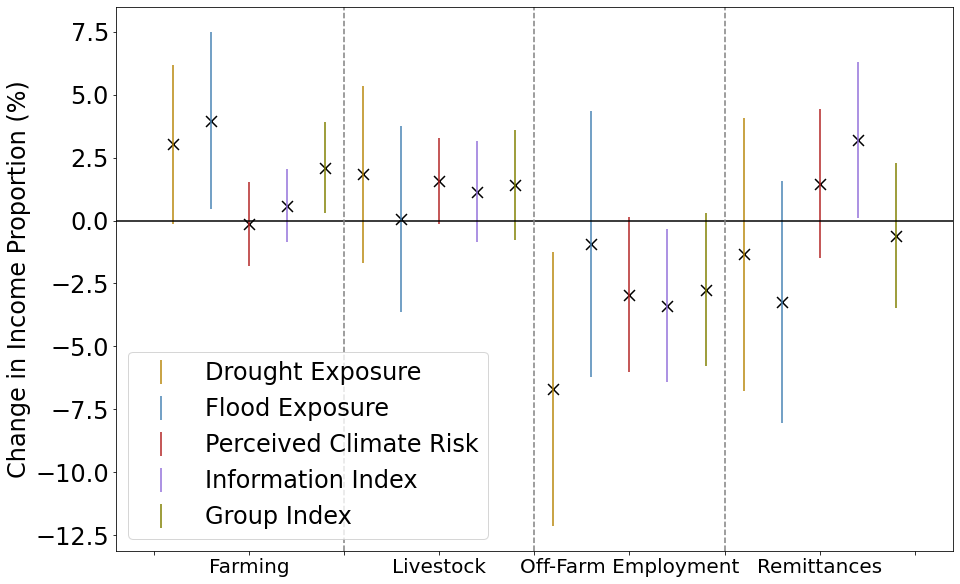

In [60]:
#Coefficient Plot
import math
#Each array is set up as [Farm, Livestock, Off-Farm, Migration Remittances]

#Model IVs: Gender, Age, Secondary, Composite Risk, Source Index, Group Index, RiskPerception of Livelihood, Flood Exp, Drought Exp, Year fe

livelihoodrisk_effects = effectdf.loc[effectdf['Effect']=='Climate Risk Perception'].values[0][1:] * 100
livelihoodrisk_std = effect_stddf.loc[effect_stddf['Effect']=='Climate Risk Perception'].values[0][1:] * 100
flood_effects = effectdf.loc[effectdf['Effect']=='Flood Exp'].values[0][1:] * 100
flood_std = effect_stddf.loc[effect_stddf['Effect']=='Flood Exp'].values[0][1:] * 100
drought_effects = effectdf.loc[effectdf['Effect']=='Drought Exp'].values[0][1:] * 100
drought_std = effect_stddf.loc[effect_stddf['Effect']=='Drought Exp'].values[0][1:] * 100
info_effects = effectdf.loc[effectdf['Effect']=='Info Sources'].values[0][1:] * 100
info_std = effect_stddf.loc[effect_stddf['Effect']=='Info Sources'].values[0][1:] * 100
group_effects = effectdf.loc[effectdf['Effect']=='Social Groups'].values[0][1:] * 100
group_std = effect_stddf.loc[effect_stddf['Effect']=='Social Groups'].values[0][1:] * 100

livelihood_err = np.zeros(len(livelihoodrisk_std))
flood_err = np.zeros(len(flood_std))
drought_err = np.zeros(len(drought_std))
info_err = np.zeros(len(info_std))
group_err = np.zeros(len(group_std))

dataset = [livelihoodrisk_std, flood_std, drought_std, info_std, group_std]
error = [livelihood_err, flood_err, drought_err, info_err, group_err]

#Cacluating confidence intervals
for data, err in zip(dataset, error):
    for i, ele in enumerate(data):
        err[i] = 1.96 * ele 
    

f, ax1 = plt.subplots(figsize=(15,10)) 

xpos = np.arange(0,len(livelihoodrisk_effects))

ax1.bar(xpos-0.4, livelihoodrisk_effects, width=0.2, color='white')
ax1.errorbar(xpos-0.4, drought_effects, yerr=drought_err, color='darkgoldenrod', label='Drought Exposure', fmt='none')

ax1.bar(xpos-0.2, flood_effects, width=0.2, color='white')
ax1.errorbar(xpos-0.2, flood_effects, yerr=flood_err, color='steelblue', label='Flood Exposure', fmt='none')

ax1.bar(xpos, drought_effects, width=0.2, color='none')
ax1.errorbar(xpos, livelihoodrisk_effects, yerr=livelihood_err, color='firebrick', label='Perceived Climate Risk', fmt='none')

ax1.bar(xpos+0.2, info_effects, width=0.2, color='white')
ax1.errorbar(xpos+0.2, info_effects, yerr=info_err, color='mediumpurple',label='Information Index', fmt='none')

ax1.bar(xpos+0.4, group_effects, width=0.2, color='white')
ax1.errorbar(xpos+0.4, group_effects, yerr=group_err, color='olive', label='Group Index', fmt='none')

offset = [-0.4, -0.2, 0, 0.2, 0.4]
marker_array = ['x','x', 'x', 'x', 'x', 'x']
effect = [drought_effects, flood_effects, livelihoodrisk_effects, info_effects, group_effects]




for i in range(len(offset)):
    ax1.scatter(x=xpos + offset[i], 
           marker=marker_array[i], s=120, 
           y=effect[i], color='black')

ax1.set_ylabel('Change in Income Proportion (%)', fontsize=24)
ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Employment', '', 'Remittances'], size=20, rotation=0)

#ax1.set_ylim([-20, 10])
plt.axhline(y=0, color='black')
plt.axvline(x=0.5, color='grey', ls='--')
plt.axvline(x=1.5, color='grey', ls='--')
plt.axvline(x=2.5, color='grey', ls='--')
plt.yticks(fontsize=24)
plt.legend(fontsize=24, loc='lower left')
#plt.show()
plt.savefig('Combined_EffectsPlot.png', bbox_inches='tight')

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_6679/314529860.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Employment', '', 'Remittances'], size=20, rotation=0)


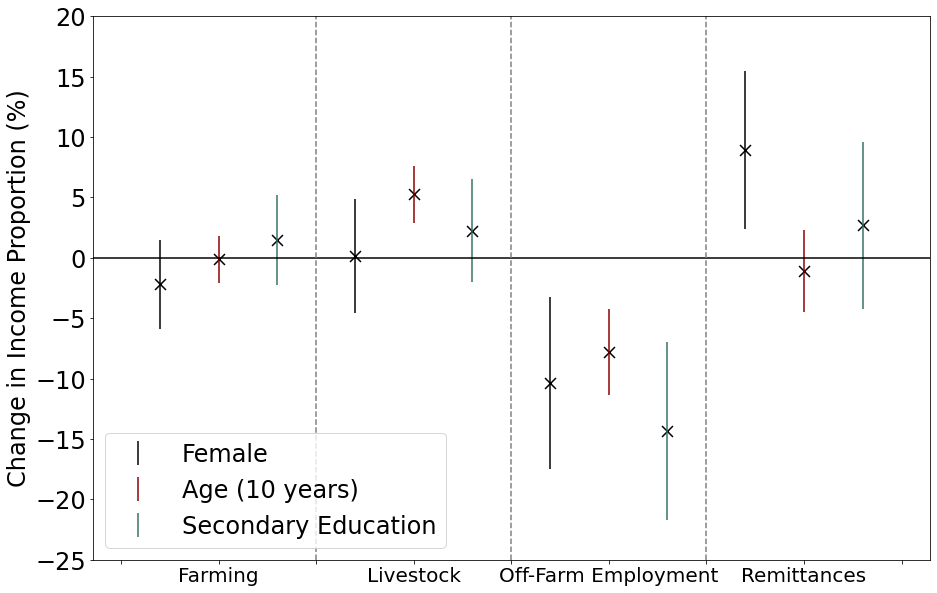

In [61]:
#Demographic Variables

gender_effects = effectdf.loc[effectdf['Effect']=='Female'].values[0][1:] * 100
gender_std = effect_stddf.loc[effect_stddf['Effect']=='Female'].values[0][1:] * 100
age10_effects = effectdf.loc[effectdf['Effect']=='Age'].values[0][1:] * 100 
age10_std = effect_stddf.loc[effect_stddf['Effect']=='Age'].values[0][1:] * 100 
secondary_effects = effectdf.loc[effectdf['Effect']=='Secondary School'].values[0][1:] * 100
secondary_std = effect_stddf.loc[effect_stddf['Effect']=='Secondary School'].values[0][1:] * 100

gender_err = np.zeros(len(gender_std))
age10_err = np.zeros(len(age10_std))
secondary_err = np.zeros(len(secondary_std))

dataset = [gender_std, age10_std, secondary_std]
error = [gender_err, age10_err, secondary_err]

#Cacluating confidence intervals
for data, err in zip(dataset, error):
    for i, ele in enumerate(data):
        err[i] = 1.96 * ele 
    

f, ax1 = plt.subplots(figsize=(15,10)) 

xpos = np.arange(0,len(gender_effects))
ax1.bar(xpos-0.3, gender_effects, width=0.3, color='white')
ax1.errorbar(xpos-0.3, gender_effects, yerr=gender_err, color='black', fmt='none',  label='Female')

ax1.bar(xpos, age10_effects, width=0.3, color='white')
ax1.errorbar(xpos, age10_effects, yerr=age10_err, color='darkred', fmt='none', label='Age (10 years)')

ax1.bar(xpos+0.3, secondary_effects, width=0.3, color='white')
ax1.errorbar(xpos+0.3, secondary_effects, yerr=secondary_err, color='#357266', fmt='none', label='Secondary Education')

offset = [-0.3, 0, 0.3]
marker_array = ['x', 'x', 'x']
effect = [gender_effects, age10_effects, secondary_effects]

for i in range(len(offset)):
    ax1.scatter(x=xpos + offset[i], 
           marker=marker_array[i], s=120, 
           y=effect[i], color='black')

ax1.set_ylabel('Change in Income Proportion (%)', fontsize=24)
ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Employment', '', 'Remittances'], size=20, rotation=0)

ax1.set_ylim([-25, 20])
plt.axhline(y=0, color='black')
plt.axvline(x=0.5, color='grey', ls='--')
plt.axvline(x=1.5, color='grey', ls='--')
plt.axvline(x=2.5, color='grey', ls='--')
plt.yticks(fontsize=24)
plt.legend(fontsize=24, loc = 'lower left')
#plt.show()
plt.savefig('DemographicEffectSizes.png', bbox_inches='tight')


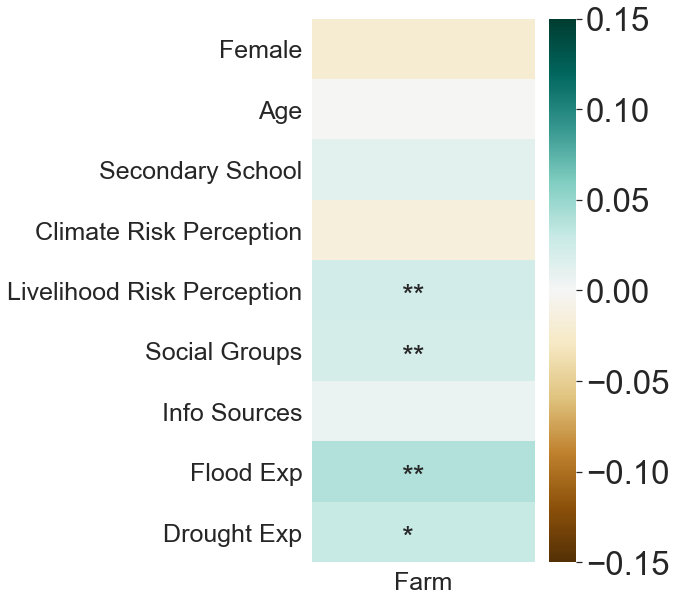

In [61]:
effects = heatmapdf[['Farm']]
effects.columns = ['Farm']

fig, ax = plt.subplots(figsize=(5,10))

sns.set(font_scale=3.0)
p = sns.heatmap(effects, vmin=-0.15, vmax=0.15, cmap='BrBG', yticklabels=heatmapdf['Effect'])

plt.annotate('**', (0.4, 4.75), fontsize=30)
plt.annotate('**', (0.4, 5.75), fontsize=30)
plt.annotate('**', (0.4, 7.75), fontsize=30)
plt.annotate('*', (0.4, 8.75), fontsize=30)

plt.annotate('**', (1.4, 0.75), fontsize=30)
plt.annotate('**', (1.4, 6.75), fontsize=30)
plt.annotate('**', (1.4, 7.75), fontsize=30)

p.set_yticklabels(heatmapdf['Effect'], fontsize=25)
p.set_xticklabels(['Farm'], fontsize=25)


#plt.show()
plt.savefig('FarmHeatMap.png', bbox_inches='tight')




## Quartile-Specific Analysis

In [117]:
#Create Heatmap basics
heatmapdf = pd.DataFrame()
dv = 'Off-Farm Employment_Prop'
heatmapdf['Effect'] = ['Gender', 'Age', 'Secondary','Climate Risk', 'GroupIndex','SourceIndex', 'FloodExp', 'DroughtExp']


In [124]:
#OLS

livelihood_dict = {'Farm_Prop': 'CerealCrops', 'Remittances_Prop': 'IntlMigrate', 'Off-Farm Labor_Prop': 'Wage', 'Livestock_Prop': 'LargeAnimal'}
quartile = 3 #Note quartile numbers run from 0 to 3
quartile_df = climate_df.loc[climate_df['IncomeQuart'] == quartile]



y = quartile_df[dv]
#x_1 = quartile_df[['Gender_x', 'Age_x', 'Secondary_x','CompositeRisk', 'GroupIndex','SourceIndex', 'Riskiness_' + livelihood_dict[dv], 'FloodExp', 'Year']]
x_1 = quartile_df[['Gender_x', 'Age_x', 'Secondary_x','CompositeRisk', 'GroupIndex','SourceIndex', 'FloodExp', 'DroughtExp', 'Year']]

#x_1 = climate_df[['Gender_x', 'Age_x', 'Secondary_x','CompositeRisk', 'GroupIndex','SourceIndex', 'Riskiness_' + livelihood_dict[dv], 'FloodExp', livelihood_dict[dv] + 'xFloodExp', 'Year']]
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
res_log = est.fit(cov_type='cluster', cov_kwds={'groups': quartile_df['HHID']})
res_log.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Off-Farm Employment_Prop   R-squared:                       0.037
Model:                                  OLS   Adj. R-squared:                  0.025
Method:                       Least Squares   F-statistic:                    0.7525
Date:                      Wed, 10 Jan 2024   Prob (F-statistic):              0.660
Time:                              16:30:07   Log-Likelihood:                -317.76
No. Observations:                       697   AIC:                             655.5
Df Residuals:                           687   BIC:                             701.0
Df Model:                                 9                                         
Covariance Type:                    cluster                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0197      0.539     -0.037      0.971      -1.076       1.037
Gender_x          0.0196      0.083      0.236      0.814      -0.144       0.183
Age_x            -0.0011      0.003     -0.351      0.726      -0.007       0.005
Secondary_x      -0.0834      0.093     -0.893      0.372      -0.266       0.100
CompositeRisk    -0.1683      0.151     -1.113      0.266      -0.464       0.128
GroupIndex        0.0444      0.031      1.446      0.148      -0.016       0.105
SourceIndex      -0.0268      0.035     -0.764      0.445      -0.095       0.042
FloodExp         -0.0198      0.057     -0.347      0.728      -0.132       0.092
DroughtExp        0.0248      0.075      0.332      0.740      -0.122       0.171
Year              0.0058      0.007      0.823      0.411      -0.008       0.020
==============================================================================
Omnibus:                      234.170   Durbin-Watson:                   0.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.885
Skew:                           0.725   Prob(JB):                     6.76e-21
Kurtosis:                       1.954   Cond. No.                     3.62e+03
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 3.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
#Saving Regression Coefficents

name = dv[:-5] + str(quartile+1)

heatmapdf[name] = res_log.params.values[1:-1]


heatmapdf['Effect'] = ['Female', 'Age', 'Secondary School', 'Climate Risk Perception', 'Social Groups', 'Info Sources', 'Flood Exp', 'Drought Exp']
heatmapdf

,Effect,Off-Farm Employment1,Off-Farm Employment2,Off-Farm Employment3,Off-Farm Employment4
0,Female,-0.129142,-0.185559,0.016603,0.019634
1,Age,-0.010517,-0.008652,0.000721,-0.001103
2,Secondary School,-0.260072,-0.177872,0.007340,-0.083355
3,Climate Risk Perception,-0.142030,-0.266413,-0.012394,-0.168258
4,Social Groups,-0.068498,-0.107645,0.029918,0.044407
5,Info Sources,-0.032145,-0.040180,-0.065642,-0.026783
6,Flood Exp,-0.020391,0.077162,-0.077741,-0.019840
7,Drought Exp,-0.111030,-0.058899,-0.093198,0.024837


In [75]:
#Saving as a Latex table
table = res_log.summary().tables[1]
print(tabulate(table, headers='firstrow', tablefmt='latex'))

\begin{tabular}{lllllll}
\hline
               & coef    & std err   & z      & P\ensuremath{>}|z|   & [0.025   & 0.975]   \\
\hline
 const         & 0.9404  & 0.394     & 2.386  & 0.017   & 0.168    & 1.713    \\
 Gender\_x      & -0.0295 & 0.020     & -1.487 & 0.137   & -0.068   & 0.009    \\
 Age\_x         & -0.0005 & 0.001     & -0.429 & 0.668   & -0.003   & 0.002    \\
 Secondary\_x   & 0.0076  & 0.025     & 0.307  & 0.759   & -0.041   & 0.056    \\
 CompositeRisk & 0.0288  & 0.030     & 0.956  & 0.339   & -0.030   & 0.088    \\
 GroupIndex    & 0.0030  & 0.010     & 0.302  & 0.763   & -0.016   & 0.023    \\
 SourceIndex   & 0.0183  & 0.012     & 1.511  & 0.131   & -0.005   & 0.042    \\
 FloodExp      & 0.0443  & 0.024     & 1.871  & 0.061   & -0.002   & 0.091    \\
 DroughtExp    & 0.0412  & 0.024     & 1.741  & 0.082   & -0.005   & 0.088    \\
 Year          & -0.0115 & 0.005     & -2.231 & 0.026   & -0.022   & -0.001   \\
\hline
\end{tabular}


## Quartile Effect Size Heat Maps

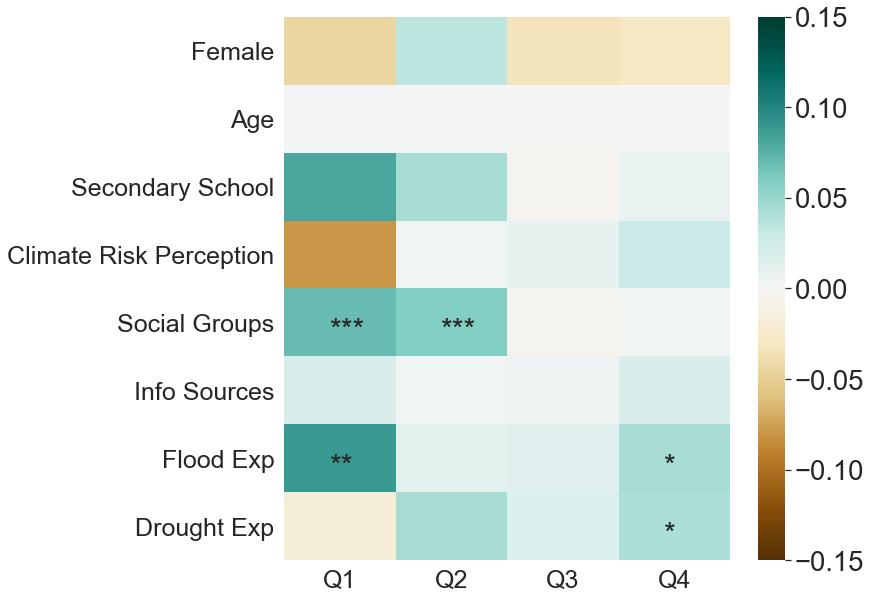

In [82]:
farmeffects = heatmapdf[['Farm1', 'Farm2', 'Farm3', 'Farm4']]
farmeffects.columns = ['Q1', 'Q2', 'Q3', 'Q4']
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=2.5)
p = sns.heatmap(farmeffects, vmin=-0.15, vmax=0.15, cmap='BrBG', yticklabels=heatmapdf['Effect'])
plt.annotate('***', (0.4, 4.75), fontsize=30)
plt.annotate('**', (0.4, 6.75), fontsize=30)
plt.annotate('***', (1.4, 4.75), fontsize=30)
#plt.annotate('***', (1.4, 5.75), fontsize=30)
plt.annotate('*', (3.4, 6.75), fontsize=30)
plt.annotate('*', (3.4, 7.75), fontsize=30)

p.set_yticklabels(heatmapdf['Effect'], fontsize=25)
p.set_xticklabels(farmeffects.columns, fontsize=25)

#plt.show()
plt.savefig('FarmQuartileHeatMap.png', bbox_inches='tight')


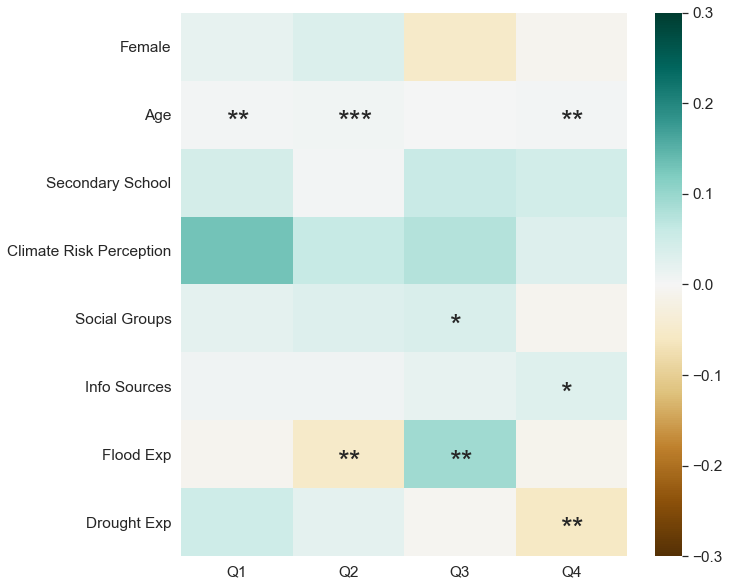

In [116]:
#Livestock Effects

livestockeffects = heatmapdf[['Livestock1', 'Livestock2', 'Livestock3', 'Livestock4']]
livestockeffects.columns = ['Q1', 'Q2', 'Q3', 'Q4']

fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.4)
p = sns.heatmap(livestockeffects, vmin=-0.3, vmax=0.3, cmap='BrBG', yticklabels=heatmapdf['Effect'])
plt.annotate('**', (0.4, 1.75), fontsize=30)

plt.annotate('***', (1.4, 1.75), fontsize=30)
plt.annotate('**', (1.4, 6.75), fontsize=30)

plt.annotate('*', (2.4, 4.75), fontsize=30)
plt.annotate('**', (2.4, 6.75), fontsize=30)
#plt.annotate('**', (2.4, 7.75), fontsize=30)

plt.annotate('**', (3.4, 1.75), fontsize=30)
plt.annotate('*', (3.4, 5.75), fontsize=30)
plt.annotate('**', (3.4, 7.75), fontsize=30)


plt.savefig('LivestockQuartileHeatMap.png', bbox_inches='tight')

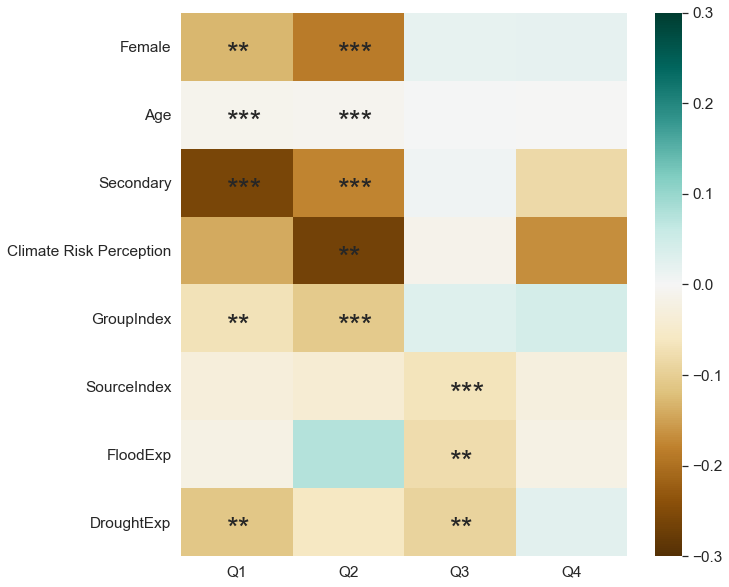

In [129]:
#off-farm Labor Effects

laboreffects = heatmapdf[['Off-Farm Employment1', 'Off-Farm Employment2', 'Off-Farm Employment3', 'Off-Farm Employment4']]
laboreffects.columns = ['Q1', 'Q2', 'Q3', 'Q4']
heatmapdf['Effect'] = ['Female', 'Age', 'Secondary', 'Climate Risk Perception', 'GroupIndex','SourceIndex', 'FloodExp', 'DroughtExp']

fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.4)
p = sns.heatmap(laboreffects, vmin=-0.3, vmax=0.3, cmap='BrBG', yticklabels=heatmapdf['Effect'])
plt.annotate('**', (0.4, 0.75), fontsize=30)
plt.annotate('***', (0.4, 1.75), fontsize=30)
plt.annotate('***', (0.4, 2.75), fontsize=30)
plt.annotate('**', (0.4, 4.75), fontsize=30)
plt.annotate('**', (0.4, 7.75), fontsize=30)

plt.annotate('***', (1.4, 0.75), fontsize=30)
plt.annotate('***', (1.4, 1.75), fontsize=30)
plt.annotate('***', (1.4, 2.75), fontsize=30)
plt.annotate('**', (1.4, 3.75), fontsize=30)
plt.annotate('***', (1.4, 4.75), fontsize=30)



plt.annotate('***', (2.4, 5.75), fontsize=30)
plt.annotate('**', (2.4, 6.75), fontsize=30)
plt.annotate('**', (2.4, 7.75), fontsize=30)




plt.savefig('LaborQuartileHeatMap.png', bbox_inches='tight')

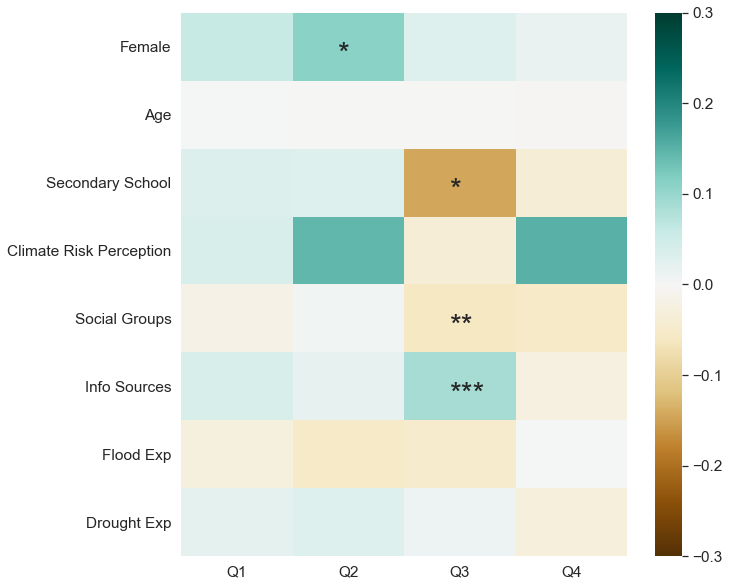

In [99]:
#RemittanceEffects

remittanceeffects = heatmapdf[['Remittances1', 'Remittances2', 'Remittances3', 'Remittances4']]
remittanceeffects.columns = ['Q1', 'Q2', 'Q3', 'Q4']
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.4)
p = sns.heatmap(remittanceeffects, vmin=-0.3, vmax=0.3, cmap='BrBG', yticklabels=heatmapdf['Effect'])
#plt.annotate('*', (0.4, 6.75), fontsize=30)
plt.annotate('*', (1.4, 0.75), fontsize=30)
plt.annotate('*', (2.4, 2.75), fontsize=30)
plt.annotate('**', (2.4, 4.75), fontsize=30)
plt.annotate('***', (2.4, 5.75), fontsize=30)
#plt.annotate('*', (3.4, 4.75), fontsize=30)
#plt.annotate('***', (3.4, 6.75), fontsize=30)


plt.savefig('RemittanceQuartileHeatMap.png', bbox_inches='tight')


# Alternate Models

In [43]:
#Alternative Model with Risk Factors

livelihood_dict = {'Farm_Prop': 'CerealCrops', 'Remittances_Prop': 'IntlMigrate', 'Off-Farm Labor_Prop': 'Wage', 'Livestock_Prop': 'LargeAnimal'}

dv = 'Remittances_Prop'

y = climate_df[dv]
#x_1 = climate_df[['CompositeRisk', 'Riskiness_' + livelihood_dict[dv], 'FloodExp', livelihood_dict[dv] + 'xFloodExp', 'Year']]
#x_1 = climate_df[['Gender_x', 'Age_x', 'Secondary_x','CompositeRisk', 'Riskiness_' + livelihood_dict[dv], 'FloodExp', livelihood_dict[dv] + 'xFloodExp', 'Year']]

#x_1 = climate_df[['Gender', 'Age_x', 'Secondary_x','GroupIndex','SourceIndex', 'CompositeRisk', 'Riskiness_' + livelihood_dict[dv],'RiceDrought', 'MaizeDrought']]

x_1 = climate_df[['Gender_x', 'Age_x', 'Secondary_x', 'Flood_Factor', 'Withering_Factor', 'GroupIndex', 'SourceIndex', 'Riskiness_' + livelihood_dict[dv], 'FloodExp', 'DroughtExp', 'Year']]
#x_1 = climate_df[['Gender_x', 'Age_x', 'Secondary_x', 'Flood_Factor', 'Withering_Factor', 'GroupIndex', 'SourceIndex', 'Riskiness_' + livelihood_dict[dv], 'FloodExp',  'Year']]
#x_1 = climate_df[['Gender_x', 'Age_x', 'Secondary_x', 'Flood_Factor', 'Withering_Factor', 'GroupIndex', 'SourceIndex', 'Riskiness_' + livelihood_dict[dv], 'RiceDrought','MaizeDrought', 'Year']]

x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
#res_log = est.fit()

res_log = est.fit(cov_type='cluster', cov_kwds={'groups': climate_df['HHID']})
res_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Remittances_Prop   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2.449
Date:                Wed, 24 May 2023   Prob (F-statistic):            0.00553
Time:                        14:40:09   Log-Likelihood:                -1589.9
No. Observations:                3427   AIC:                             3204.
Df Residuals:                    3415   BIC:                             3277.
Df Model:                          11                                         
Covariance Type:              cluster                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.8073      0.301      2.678      0.007       0.216       1.398
Gender_x                  0.0855      0.033      2.566      0.010       0.020       0.151
Age_x                    -0.0007      0.001     -0.558      0.577      -0.003       0.002
Secondary_x               0.0333      0.035      0.951      0.342      -0.035       0.102
Flood_Factor              0.0239      0.015      1.587      0.112      -0.006       0.053
Withering_Factor          0.0061      0.019      0.319      0.750      -0.031       0.043
GroupIndex               -0.0062      0.015     -0.424      0.672      -0.035       0.022
SourceIndex               0.0310      0.016      1.990      0.047       0.000       0.061
Riskiness_IntlMigrate    -0.0705      0.034     -2.060      0.039      -0.138      -0.003
FloodExp                 -0.0366      0.024     -1.538      0.124      -0.083       0.010
DroughtExp               -0.0107      0.027     -0.393      0.694      -0.064       0.043
Year                     -0.0050      0.004     -1.388      0.165      -0.012       0.002
==============================================================================
Omnibus:                      732.301   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              566.131
Skew:                           0.897   Prob(JB):                    1.16e-123
Kurtosis:                       2.138   Cond. No.                     3.60e+03
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 3.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#Alternate Model with Local and National Sources

livelihood_dict = {'Farm_Prop': 'CerealCrops', 'Remittances_Prop': 'IntlMigrate', 'Off-Farm Labor_Prop': 'Wage', 'Livestock_Prop': 'LargeAnimal'}

dv = 'Remittances_Prop'

y = climate_df[dv]
#x_1 = climate_df[['Gender', 'Age', 'Secondary','GroupIndex','SourceIndex', 'CompositeRisk', 'Riskiness_' + livelihood_dict[dv],'RiceDrought', 'MaizeDrought']]
#x_1 = climate_df[['Gender', 'Age', 'Secondary','GroupIndex','SourceIndex', 'CompositeRisk', 'Riskiness_CerealCrops', 'Riskiness_IntlMigrate', 'Riskiness_Wage', 'MaizeDrought', 'RiceDrought']]

#x_1 = climate_df[['Gender_x', 'Age_x', 'Secondary','GroupIndex','SourceIndex', 'CompositeRisk', 'RiskSeek','Riskiness_' + livelihood_dict[dv], 'FloodExp', livelihood_dict[dv] + 'xFloodExp', livelihood_dict[dv] + 'xFloodExpxRiskSeek', 'Year_x']]
#x_1 = climate_df[['CompositeRisk', 'Riskiness_' + livelihood_dict[dv], 'FloodExp', livelihood_dict[dv] + 'xFloodExp', 'Year_x']]
#x_1 = climate_df[['Gender_x', 'Age_x', 'Secondary_x', 'CompositeRisk','GroupIndex', 'LocalIndex', 'NationalIndex', 'Riskiness_' + livelihood_dict[dv], 'FloodExp', 'DroughtExp', 'Year']]
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
res_log = est.fit(cov_type='cluster', cov_kwds={'groups': climate_df['HHID']})
res_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Remittances_Prop   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2.212
Date:                Wed, 24 May 2023   Prob (F-statistic):             0.0129
Time:                        14:50:34   Log-Likelihood:                -1596.7
No. Observations:                3427   AIC:                             3217.
Df Residuals:                    3415   BIC:                             3291.
Df Model:                          11                                         
Covariance Type:              cluster                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.8459      0.306      2.769      0.006       0.247       1.445
Gender_x                  0.0821      0.033      2.464      0.014       0.017       0.147
Age_x                    -0.0010      0.001     -0.782      0.434      -0.004       0.002
Secondary_x               0.0330      0.035      0.942      0.346      -0.036       0.102
CompositeRisk             0.0674      0.060      1.124      0.261      -0.050       0.185
GroupIndex               -0.0055      0.014     -0.382      0.702      -0.034       0.023
LocalIndex                0.0177      0.016      1.107      0.268      -0.014       0.049
NationalIndex             0.0108      0.017      0.653      0.514      -0.022       0.043
Riskiness_IntlMigrate    -0.0728      0.035     -2.100      0.036      -0.141      -0.005
FloodExp                 -0.0293      0.024     -1.209      0.226      -0.077       0.018
DroughtExp               -0.0132      0.028     -0.478      0.633      -0.067       0.041
Year                     -0.0055      0.004     -1.498      0.134      -0.013       0.002
==============================================================================
Omnibus:                      746.907   Durbin-Watson:                   0.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.919
Skew:                           0.901   Prob(JB):                    6.45e-125
Kurtosis:                       2.131   Cond. No.                     3.60e+03
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 3.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#Alternate Model with Professional Sources


livelihood_dict = {'Farm_Prop': 'CerealCrops', 'Remittances_Prop': 'IntlMigrate', 'Off-Farm Labor_Prop': 'Wage', 'Livestock_Prop': 'LargeAnimal'}

dv = 'Livestock_Prop'

y = climate_df[dv]

x_1 = climate_df[['Gender_x', 'Age_x', 'Secondary_x', 'CompositeRisk','GroupIndex', 'Professional', 'Riskiness_' + livelihood_dict[dv], 'FloodExp',  'Year']]
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
res_log = est.fit(cov_type='cluster', cov_kwds={'groups': climate_df['HHID']})
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Livestock_Prop   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     3.637
Date:                Tue, 23 May 2023   Prob (F-statistic):           0.000206
Time:                        11:34:39   Log-Likelihood:                -401.01
No. Observations:                3427   AIC:                             822.0
Df Residuals:                    3417   BIC:                             883.4
Df Model:                           9                                         
Covariance Type:              cluster                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0481      0.208      0.232      0.817      -0.359       0.455
Gender_x                  0.0028      0.024      0.115      0.909      -0.044       0.050
Age_x                     0.0039      0.001      4.248      0.000       0.002       0.006
Secondary_x               0.0253      0.022      1.159      0.246      -0.017       0.068
CompositeRisk             0.0547      0.037      1.496      0.135      -0.017       0.126
GroupIndex                0.0143      0.011      1.342      0.179      -0.007       0.035
Professional              0.0109      0.010      1.107      0.268      -0.008       0.030
Riskiness_LargeAnimal    -0.0122      0.018     -0.683      0.495      -0.047       0.023
FloodExp                  0.0062      0.019      0.323      0.746      -0.031       0.044
Year                     -0.0006      0.003     -0.251      0.802      -0.006       0.004
==============================================================================
Omnibus:                     1010.142   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2264.428
Skew:                           1.707   Prob(JB):                         0.00
Kurtosis:                       5.050   Cond. No.                     3.58e+03
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 3.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#Saving as a Latex table
table = res_log.summary().tables[1]
print(tabulate(table, headers='firstrow', tablefmt='latex'))

\begin{tabular}{lllllll}
\hline
                & coef    & std err   & t       & P\ensuremath{>}|t|   & [0.025   & 0.975]   \\
\hline
 const          & 0.0443  & 0.094     & 0.469   & 0.639   & -0.141   & 0.230    \\
 Gender\_x       & -0.1072 & 0.006     & -18.469 & 0.000   & -0.119   & -0.096   \\
 Age\_x          & -0.0059 & 0.000     & -24.982 & 0.000   & -0.006   & -0.005   \\
 Secondary      & -0.1404 & 0.006     & -23.657 & 0.000   & -0.152   & -0.129   \\
 GroupIndex     & -0.0289 & 0.003     & -11.177 & 0.000   & -0.034   & -0.024   \\
 SourceIndex    & -0.0358 & 0.003     & -13.679 & 0.000   & -0.041   & -0.031   \\
 CompositeRisk  & -0.0726 & 0.010     & -7.323  & 0.000   & -0.092   & -0.053   \\
 Riskiness\_Wage & -0.0104 & 0.005     & -2.267  & 0.023   & -0.019   & -0.001   \\
 FloodExp       & -0.0948 & 0.027     & -3.533  & 0.000   & -0.147   & -0.042   \\
 WagexFloodExp  & 0.0302  & 0.010     & 2.958   & 0.003   & 0.010    & 0.050    \\
 Year\_x         & 0.0099  & 0.0

# Bar Graph of Effect Sizes

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_3061/333137988.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Labor', '', 'Remittances'], size=24, rotation=0)


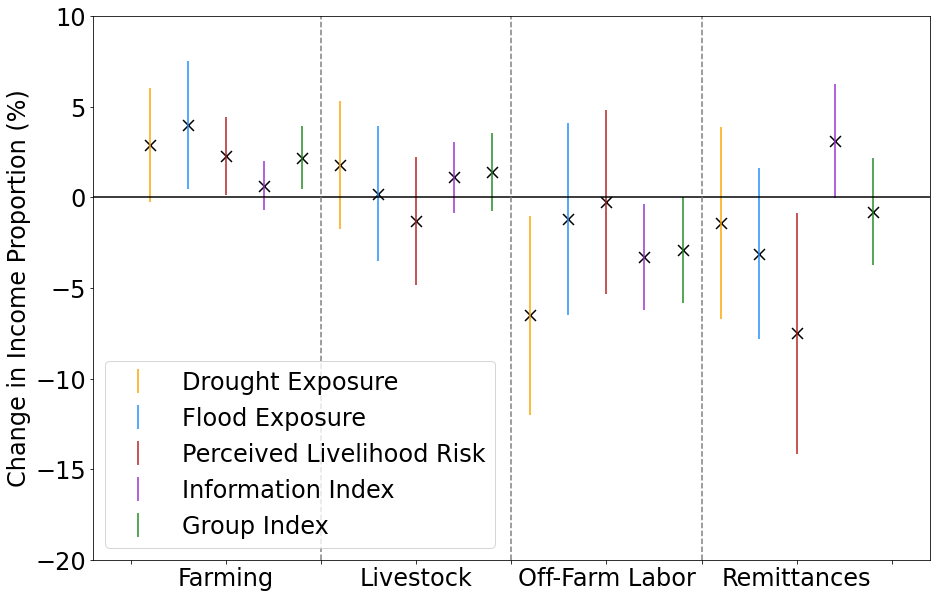

In [46]:
#Bar Graph of 5 Variables

import math
#Each array is set up as [Farm, Livestock, Off-Farm, Migration Remittances]

#Model IVs: Gender, Age, Secondary, Composite Risk, Source Index, Group Index, RiskPerception of Livelihood, Flood Exp, Drought Exp, Year fe

livelihoodrisk_effects = [2.3, -1.3, -0.26, -7.5]
livelihoodrisk_std = [1.1, 1.8, 2.6, 3.4]
flood_effects = [4.0, 0.2, -1.2, -3.1]
flood_std = [1.8, 1.9, 2.7, 2.4]
drought_effects = [2.9, 1.8, -6.5, -1.4]
drought_std = [1.6, 1.8, 2.8, 2.7]
info_effects = [0.65, 1.1, -3.3, 3.1]
info_std = [0.7, 1.0, 1.5, 1.6]
group_effects = [2.2, 1.4, -2.9,-0.78]
group_std = [0.9, 1.1,1.5, 1.5]

livelihood_err = np.zeros(len(livelihoodrisk_std))
flood_err = np.zeros(len(flood_std))
drought_err = np.zeros(len(drought_std))
info_err = np.zeros(len(info_std))
group_err = np.zeros(len(group_std))

dataset = [livelihoodrisk_std, flood_std, drought_std, info_std, group_std]
error = [livelihood_err, flood_err, drought_err, info_err, group_err]

#Cacluating confidence intervals
for data, err in zip(dataset, error):
    for i, ele in enumerate(data):
        err[i] = 1.96 * ele 
    

f, ax1 = plt.subplots(figsize=(15,10)) 

xpos = np.arange(0,len(livelihoodrisk_effects))

ax1.bar(xpos-0.4, drought_effects, width=0.2, color='white')
ax1.errorbar(xpos-0.4, drought_effects, yerr=drought_err, color='orange', label='Drought Exposure', fmt='none')

ax1.bar(xpos-0.2, flood_effects, width=0.2, color='white')
ax1.errorbar(xpos-0.2, flood_effects, yerr=flood_err, color='dodgerblue', label='Flood Exposure', fmt='none')

ax1.bar(xpos, livelihoodrisk_effects, width=0.2, color='none')
ax1.errorbar(xpos, livelihoodrisk_effects, yerr=livelihood_err, color='firebrick', label='Perceived Livelihood Risk', fmt='none')

ax1.bar(xpos+0.2, info_effects, width=0.2, color='white')
ax1.errorbar(xpos+0.2, info_effects, yerr=info_err, color='darkorchid',label='Information Index', fmt='none')

ax1.bar(xpos+0.4, group_effects, width=0.2, color='white')
ax1.errorbar(xpos+0.4, group_effects, yerr=group_err, color='forestgreen', label='Group Index', fmt='none')

offset = [-0.4, -0.2, 0, 0.2, 0.4]
marker_array = ['x','x', 'x', 'x', 'x', 'x']
effect = [drought_effects, flood_effects, livelihoodrisk_effects, info_effects, group_effects]




for i in range(len(offset)):
    ax1.scatter(x=xpos + offset[i], 
           marker=marker_array[i], s=120, 
           y=effect[i], color='black')

ax1.set_ylabel('Change in Income Proportion (%)', fontsize=24)
ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Labor', '', 'Remittances'], size=24, rotation=0)

ax1.set_ylim([-20, 10])
plt.axhline(y=0, color='black')
plt.axvline(x=0.5, color='grey', ls='--')
plt.axvline(x=1.5, color='grey', ls='--')
plt.axvline(x=2.5, color='grey', ls='--')
plt.yticks(fontsize=24)
plt.legend(fontsize=24, loc='lower left')
#plt.show()
plt.savefig('Combined_EffectsPlot.png', bbox_inches='tight')

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_10311/757011897.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Labor', '', 'Remittances'], size=24, rotation=0)


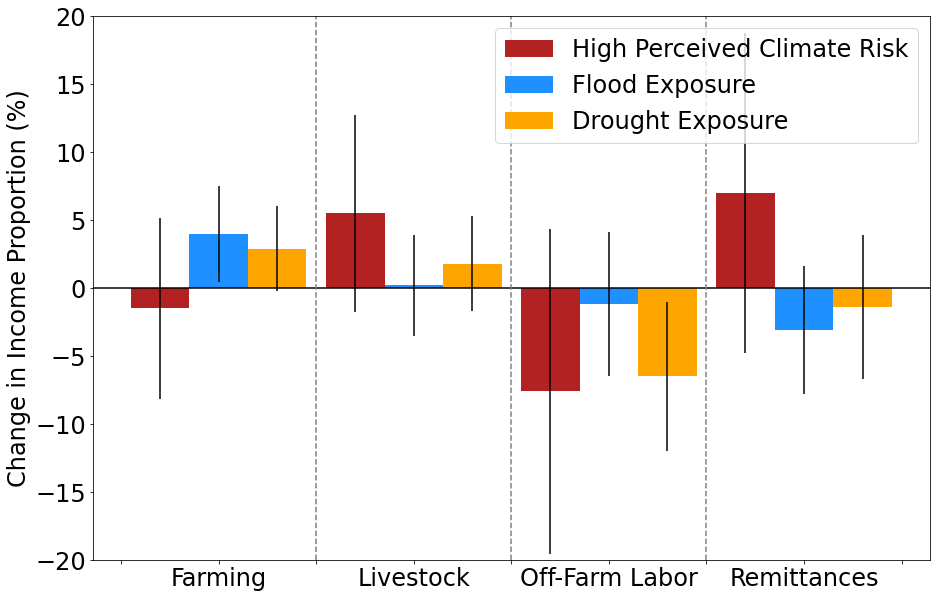

In [22]:
#Setting up bar graph of percent effect sizes on income proportion
import math
#Each array is set up as [Farm, Livestock, Off-Farm, Migration Remittances]

#Model IVs: Gender, Age, Secondary, Composite Risk, Source Index, Group Index, RiskPerception of Livelihood, Flood Exp, Drought Exp, Year fe

climaterisk_effects = [-1.5, 5.5, -7.6, 7.0]
climaterisk_std = [3.4, 3.7, 6.1, 6.0]
flood_effects = [4.0, 0.2, -1.2, -3.1]
flood_std = [1.8, 1.9, 2.7, 2.4]
drought_effects = [2.9, 1.8, -6.5, -1.4]
drought_std = [1.6, 1.8, 2.8, 2.7]

climate_err = np.zeros(len(climaterisk_std))
flood_err = np.zeros(len(flood_std))
drought_err = np.zeros(len(drought_std))

dataset = [climaterisk_std, flood_std, drought_std]
error = [climate_err, flood_err, drought_err]

#Cacluating confidence intervals
for data, err in zip(dataset, error):
    for i, ele in enumerate(data):
        err[i] = 1.96 * ele 
    

f, ax1 = plt.subplots(figsize=(15,10)) 

xpos = np.arange(0,len(climaterisk_effects))
ax1.bar(xpos-0.3, climaterisk_effects, width=0.3, label='High Perceived Climate Risk', color='firebrick')
ax1.errorbar(xpos-0.3, climaterisk_effects, yerr=climate_err, color='black', fmt='none')

ax1.bar(xpos, flood_effects, width=0.3, label='Flood Exposure', color='dodgerblue')
ax1.errorbar(xpos, flood_effects, yerr=flood_err, color='black', fmt='none')

ax1.bar(xpos+0.3, drought_effects, width=0.3, label='Drought Exposure', color='orange')
ax1.errorbar(xpos+0.3, drought_effects, yerr=drought_err, color='black', fmt='none')

ax1.set_ylabel('Change in Income Proportion (%)', fontsize=24)
ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Labor', '', 'Remittances'], size=24, rotation=0)

ax1.set_ylim([-20, 20])
plt.axhline(y=0, color='black')
plt.axvline(x=0.5, color='grey', ls='--')
plt.axvline(x=1.5, color='grey', ls='--')
plt.axvline(x=2.5, color='grey', ls='--')
plt.yticks(fontsize=24)
plt.legend(fontsize=24)
#plt.show()
plt.savefig('HazardEffectSizes.png', bbox_inches='tight')


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_3061/811254987.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Labor', '', 'Remittances'], size=24, rotation=0)


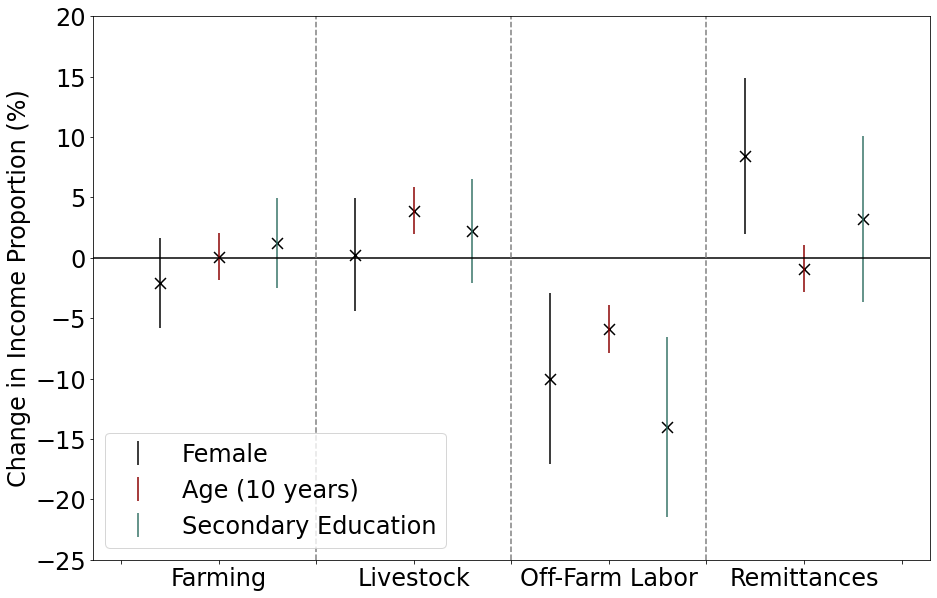

In [64]:
#Demographic Variables

#Setting up bar graph of percent effect sizes on income proportion
import math
#Each array is set up as [Farm, Livestock, Off-Farm, Migration Remittances]

#Model IVs: Gender, Age, Secondary, Composite Risk, Source Index, Group Index, Flood Exp, Drought Exp, Year fe

gender_effects = [-2.1, 0.27, -10, 8.4]
gender_std = [1.9, 2.4, 3.6, 3.3]
age10_effects = [0.1, 3.9, -5.9, -0.9]
age10_std = [1.0, 1.0, 1.0, 1.0]
secondary_effects = [1.2, 2.2, -14, 3.2]
secondary_std = [1.9, 2.2, 3.8, 3.5]

gender_err = np.zeros(len(gender_std))
age10_err = np.zeros(len(age10_std))
secondary_err = np.zeros(len(secondary_std))

dataset = [gender_std, age10_std, secondary_std]
error = [gender_err, age10_err, secondary_err]

#Cacluating confidence intervals
for data, err in zip(dataset, error):
    for i, ele in enumerate(data):
        err[i] = 1.96 * ele 
    

f, ax1 = plt.subplots(figsize=(15,10)) 

xpos = np.arange(0,len(gender_effects))
ax1.bar(xpos-0.3, gender_effects, width=0.3, color='white')
ax1.errorbar(xpos-0.3, gender_effects, yerr=gender_err, color='black', fmt='none',  label='Female')

ax1.bar(xpos, age10_effects, width=0.3, color='white')
ax1.errorbar(xpos, age10_effects, yerr=age10_err, color='darkred', fmt='none', label='Age (10 years)')

ax1.bar(xpos+0.3, secondary_effects, width=0.3, color='white')
ax1.errorbar(xpos+0.3, secondary_effects, yerr=secondary_err, color='#357266', fmt='none', label='Secondary Education')

offset = [-0.3, 0, 0.3]
marker_array = ['x', 'x', 'x']
effect = [gender_effects, age10_effects, secondary_effects]

for i in range(len(offset)):
    ax1.scatter(x=xpos + offset[i], 
           marker=marker_array[i], s=120, 
           y=effect[i], color='black')

ax1.set_ylabel('Change in Income Proportion (%)', fontsize=24)
ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Labor', '', 'Remittances'], size=24, rotation=0)

ax1.set_ylim([-25, 20])
plt.axhline(y=0, color='black')
plt.axvline(x=0.5, color='grey', ls='--')
plt.axvline(x=1.5, color='grey', ls='--')
plt.axvline(x=2.5, color='grey', ls='--')
plt.yticks(fontsize=24)
plt.legend(fontsize=24, loc = 'lower left')
#plt.show()
plt.savefig('DemographicEffectSizes.png', bbox_inches='tight')


[1.764 2.156 2.94  2.94 ]


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_10311/161057665.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Labor', '', 'Remittances'], size=24, rotation=0)


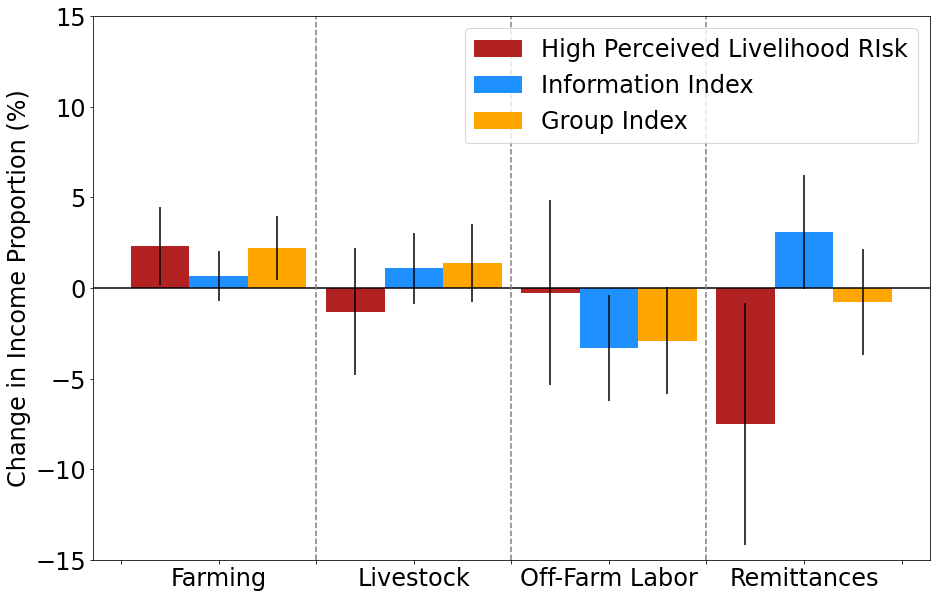

In [24]:
#Informational and Social Capital
import math
obs = len(climate_df)
#Each array is set up as [Farm, Livestock, Off-Farm, Migration Remittances]

#Model IVs: Gender, Age, Secondary, Composite Risk, Source Index, Group Index, Flood Exp, Drought Exp, Year fe

livelihoodrisk_effects = [2.3, -1.3, -0.26, -7.5]
livelihoodrisk_std = [1.1, 1.8, 2.6, 3.4]
info_effects = [0.65, 1.1, -3.3, 3.1]
info_std = [0.7, 1.0, 1.5, 1.6]
group_effects = [2.2, 1.4, -2.9,-0.78]
group_std = [0.9, 1.1,1.5, 1.5]

livelihood_err = np.zeros(len(livelihoodrisk_std))
info_err = np.zeros(len(info_std))
group_err = np.zeros(len(group_std))

dataset = [livelihoodrisk_std, info_std, group_std]
error = [livelihood_err, info_err, group_err]

#Cacluating confidence intervals
for data, err in zip(dataset, error):
    for i, ele in enumerate(data):
        err[i] = 1.96 * ele
    
print(err)
f, ax1 = plt.subplots(figsize=(15,10)) 

xpos = np.arange(0,len(climaterisk_effects))
ax1.bar(xpos-0.3, livelihoodrisk_effects, width=0.3, label='High Perceived Livelihood RIsk', color='firebrick')
ax1.errorbar(xpos-0.3, livelihoodrisk_effects, yerr=livelihood_err, color='black', fmt='none')

ax1.bar(xpos, info_effects, width=0.3, label='Information Index', color='dodgerblue')
ax1.errorbar(xpos, info_effects, yerr=info_err, color='black', fmt='none')

ax1.bar(xpos+0.3, group_effects, width=0.3, label='Group Index', color='orange')
ax1.errorbar(xpos+0.3, group_effects, yerr=group_err, color='black', fmt='none')

ax1.set_ylabel('Change in Income Proportion (%)', fontsize=24)
ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Labor', '', 'Remittances'], size=24, rotation=0)

ax1.set_ylim([-15, 15])
plt.axhline(y=0, color='black')
plt.axvline(x=0.5, color='grey', ls='--')
plt.axvline(x=1.5, color='grey', ls='--')
plt.axvline(x=2.5, color='grey', ls='--')
plt.yticks(fontsize=24)
plt.legend(fontsize=24)
#plt.show()
plt.savefig('SocialCapitalEffectSizes.png', bbox_inches='tight')

In [57]:
#Effect of specific climate hazard perceptions #TRY 1 YEAR LAG

#OLS
livelihood_dict = {'Farm_Prop': 'CerealCrops', 'Remittances_Prop': 'IntlMigrate', 'Off-Farm Labor_Prop': 'Wage'}

dv = 'Farm_Prop'

y = climate_df[dv]
x_1 = climate_df[['Gender_x', 'Age_x', 'Secondary','GroupIndex','SourceIndex', 'CompositeRisk', 'FloodExp', 'House']]
   
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
res_log = est.fit()
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Farm_Prop   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     77.21
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          6.32e-172
Time:                        17:46:20   Log-Likelihood:                 1241.5
No. Observations:               23989   AIC:                            -2459.
Df Residuals:                   23977   BIC:                            -2362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1150      0.009     12.744      0.000       0.097       0.133
Gender_x         -0.0247      0.004     -7.025      0.000      -0.032      -0.018
Age_x            -0.0004      0.000     -2.749      0.006      -0.001      -0.000
Secondary         0.0067      0.004      1.860      0.063      -0.000       0.014
GroupIndex        0.0198      0.002     12.756      0.000       0.017       0.023
SourceIndex       0.0040      0.002      2.516      0.012       0.001       0.007
CompositeRisk    -0.0201      0.006     -3.394      0.001      -0.032      -0.008
DroughtExp        0.0122      0.004      3.321      0.001       0.005       0.019
FloodExp          0.0264      0.004      6.808      0.000       0.019       0.034
PestsExp          0.0234      0.004      6.384      0.000       0.016       0.031
FrostExp          0.0302      0.003      9.277      0.000       0.024       0.037
HeatExp           0.0300      0.005      5.458      0.000       0.019       0.041
==============================================================================
Omnibus:                    12506.886   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67998.251
Skew:                           2.590   Prob(JB):                         0.00
Kurtosis:                       9.418   Cond. No.                         305.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Effect of Risk Perceptions on Income Proportions - Grouped by Household

In [18]:
#Loading DataFrames
demographics = pd.read_csv('Demographics.csv')
info = pd.read_csv('Information.csv')
social = pd.read_csv('SocialNetworks.csv')
climaterisk = pd.read_csv('ClimateRiskPerceptions.csv')
livelihoodrisk = pd.read_csv('LivelihoodPerceptions.csv')
adaptation = pd.read_csv('AdaptationStrategies.csv')
indperceptions = pd.read_csv('IndividualHazardPerceptions.csv')
exposure = pd.read_csv('Narrow_exposure.csv')
incomes = pd.read_csv('MeanIncomes.csv')
climate = pd.read_csv('ClimateData.csv')
riskpref = pd.read_csv('RiskPreferences.csv')
aspirations = pd.read_csv('Aspirations.csv')

In [19]:
#Merging Dataframes
income_df = pd.DataFrame()

merge1 = pd.merge(demographics, info, on='HHID')
merge2 = pd.merge(merge1, climaterisk, on='HHID')
merge3 = pd.merge(merge2, livelihoodrisk, on='HHID')
merge4 = pd.merge(merge3, social, on='HHID')
merge5 = pd.merge(merge4, incomes, on='HHID')
merge6 = pd.merge(merge5, aspirations, on='HHID')

income_df = merge6.dropna()

income_df

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_53670/4076850470.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge3 = pd.merge(merge2, livelihoodrisk, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_53670/4076850470.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge5 = pd.merge(merge4, incomes, on='HHID')


,Unnamed: 0_x,HHID,IWTime,SN,Age_x,Gender_x,M_Status,Class,S_Name,Occupation,...,Education,Money,Appliances,Vehicle,House,Land,FarmContinuity,ProsperousCommunity,principal component 1,principal component 2
0,2,2301006,0:10,1,43,0,1,9,0,2,...,0,1,0,0,1,1,0,0,0.633545,-1.783623
2,9,2301013,0:06,1,49,1,1,0,0,6,...,0,1,0,0,1,1,0,0,0.633545,-1.783623
3,11,2301016,0:15,1,55,1,1,0,0,5,...,0,1,0,1,1,1,0,1,-0.650517,-0.986341
4,22,2301017,0:05,1,47,1,1,10,0,5,...,0,0,0,0,1,0,0,1,1.955113,0.959999
5,26,2301021,0:10,1,65,0,1,10,0,5,...,0,1,0,0,1,1,0,1,0.326855,-0.843614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2360,2611114,0:11,1,47,0,1,0,0,3,...,1,0,0,0,0,1,0,0,1.771793,0.531025
496,2367,2611115,0:10,1,36,1,1,5,0,5,...,0,1,0,1,1,1,0,1,-0.650517,-0.986341
497,2372,2611117,0:09,1,44,1,1,0,0,5,...,0,0,1,0,1,1,0,0,0.529845,-0.442407
498,2376,2611118,0:04,1,56,1,1,0,0,5,...,0,1,0,0,0,1,0,0,1.526151,-1.508926


In [25]:
#OLS
#OLS
livelihood_dict = {'Farm_Prop': 'CerealCrops', 'Remittances_Prop': 'IntlMigrate', 'Off-Farm Labor_Prop': 'Wage'}

dv = 'Farm_Prop'

y = income_df[dv]
x_1 = income_df[['Gender_x', 'Age_x', 'Secondary','GroupIndex','SourceIndex', 'CompositeRisk', 'Riskiness_CerealCrops', 'Riskiness_IntlMigrate', 'Riskiness_Wage', 'principal component 1', 'principal component 2']]

            
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
res_log = est.fit()
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Farm_Prop   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.098
Date:                Sat, 11 Mar 2023   Prob (F-statistic):             0.0191
Time:                        15:42:14   Log-Likelihood:                 249.08
No. Observations:                 498   AIC:                            -474.2
Df Residuals:                     486   BIC:                            -423.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1246      0.061      2.058      0.040       0.006       0.244
Gender_x                 -0.0151      0.016     -0.961      0.337      -0.046       0.016
Age_x                     0.0001      0.001      0.167      0.868      -0.001       0.001
Secondary                 0.0101      0.016      0.620      0.536      -0.022       0.042
GroupIndex                0.0222      0.007      3.163      0.002       0.008       0.036
SourceIndex               0.0002      0.007      0.025      0.980      -0.014       0.014
CompositeRisk             0.0187      0.027      0.682      0.496      -0.035       0.073
Riskiness_CerealCrops     0.0251      0.012      2.117      0.035       0.002       0.048
Riskiness_IntlMigrate    -0.0210      0.014     -1.455      0.146      -0.049       0.007
Riskiness_Wage           -0.0187      0.012     -1.604      0.109      -0.042       0.004
principal component 1    -0.0031      0.004     -0.760      0.447      -0.011       0.005
principal component 2    -0.0065      0.005     -1.281      0.201      -0.017       0.003
==============================================================================
Omnibus:                      352.249   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3881.551
Skew:                           3.074   Prob(JB):                         0.00
Kurtosis:                      15.217   Cond. No.                         438.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Saving as a Latex table
table = res_log.summary().tables[1]
print(tabulate(table, headers='firstrow', tablefmt='latex'))

\begin{tabular}{lllllll}
\hline
                       & coef    & std err   & t      & P\ensuremath{>}|t|   & [0.025   & 0.975]   \\
\hline
 const                 & 0.5010  & 0.142     & 3.526  & 0.000   & 0.222    & 0.780    \\
 Gender                & -0.0811 & 0.037     & -2.200 & 0.028   & -0.153   & -0.009   \\
 Age                   & -0.0051 & 0.001     & -3.407 & 0.001   & -0.008   & -0.002   \\
 Secondary             & -0.1172 & 0.038     & -3.101 & 0.002   & -0.191   & -0.043   \\
 GroupIndex            & -0.0214 & 0.016     & -1.303 & 0.193   & -0.054   & 0.011    \\
 SourceIndex           & -0.0374 & 0.016     & -2.266 & 0.024   & -0.070   & -0.005   \\
 CompositeRisk         & -0.1251 & 0.064     & -1.945 & 0.052   & -0.251   & 0.001    \\
 Riskiness\_CerealCrops & -0.0439 & 0.028     & -1.579 & 0.115   & -0.098   & 0.011    \\
 Riskiness\_IntlMigrate & 0.1161  & 0.034     & 3.435  & 0.001   & 0.050    & 0.183    \\
 Riskiness\_Wage        & -0.0006 & 0.027     & -0.020 &

## Reverse Causality Check - Effect of Income Proportion on Risk Perceptions

In [3]:
#Loading dataframes
demographics = pd.read_csv('Demographics.csv')
info = pd.read_csv('Information.csv')
social = pd.read_csv('SocialNetworks.csv')
climaterisk = pd.read_csv('ClimateRiskPerceptions.csv')
livelihoodrisk = pd.read_csv('LivelihoodPerceptions.csv')
adaptation = pd.read_csv('AdaptationStrategies.csv')
indperceptions = pd.read_csv('IndividualHazardPerceptions.csv')
exposure = pd.read_csv('AnnualExposure.csv')
hazards = pd.read_csv('Narrow_exposure.csv')

incomes = pd.read_csv('IncomeBlocks.csv')
climate = pd.read_csv('ClimateData.csv')
riskpref = pd.read_csv('RiskPreferences.csv')
aspirations = pd.read_csv('Aspirations.csv')
factored_riskperceptions = pd.read_csv('RiskPerceptions_2FactorAnalysis.csv')

In [19]:
incomes

,Unnamed: 0,HHID,Year,Total,Farm_Prop,Livestock_Prop,Remittances_Prop,Off-Farm Employment_Prop,Other_Prop
0,0,2301006,72,385000.0,0.064935,0.311688,0.000000,0.311688,0.311688
1,1,2301007,72,82000.0,0.000000,0.121951,0.000000,0.878049,0.000000
2,2,2301013,72,22000.0,0.000000,1.000000,0.000000,0.000000,0.000000
3,3,2301016,72,549000.0,0.000000,0.052823,0.000000,0.728597,0.218579
4,4,2301017,72,18000.0,1.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
3495,3495,2611114,78,528000.0,0.030303,0.015152,0.000000,0.954545,0.000000
3496,3496,2611115,78,490000.0,0.022449,0.218367,0.000000,0.612245,0.146939
3497,3497,2611117,78,370000.0,0.108108,0.351351,0.000000,0.540541,0.000000
3498,3498,2611118,78,57000.0,0.403509,0.000000,0.000000,0.385965,0.210526


In [4]:
#Merging datasets
income_df = pd.DataFrame()

merge1 = pd.merge(demographics, info, on='HHID')
merge2 = pd.merge(merge1, social, on='HHID')
merge3 = pd.merge(merge2, climaterisk, on='HHID')
merge4 = pd.merge(merge3, livelihoodrisk, on='HHID')
merge5 = pd.merge(merge4, indperceptions, on='HHID')
merge6 = pd.merge(merge5, hazards, on='HHID')



/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_39736/1836900324.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge3 = pd.merge(merge2, climaterisk, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_39736/1836900324.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge5 = pd.merge(merge4, indperceptions, on='HHID')


In [5]:
avg_income = incomes.groupby(['HHID']).mean().reset_index()
total_exposure = exposure.groupby(['HHID']).sum().reset_index()
merge7 = pd.merge(merge6, avg_income, on='HHID')
merge8 = pd.merge(merge7, total_exposure, on='HHID')
climate_df = merge8.dropna()

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_39736/2128055415.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge7 = pd.merge(merge6, avg_income, on='HHID')


In [40]:
avg_income

,HHID,Unnamed: 0,Year,Total,Farm_Prop,Livestock_Prop,Remittances_Prop,Off-Farm Employment_Prop,Other_Prop
0,2301006,1500.0,75.0,4.823714e+05,0.037608,0.115729,0.000000,0.138452,0.708211
1,2301007,1501.0,75.0,9.185714e+04,0.000000,0.309707,0.000000,0.690293,0.000000
2,2301013,1502.0,75.0,2.610000e+05,0.000000,0.280524,0.719476,0.000000,0.000000
3,2301016,1503.0,75.0,5.781429e+05,0.000000,0.054152,0.000000,0.710738,0.235111
4,2301017,1504.0,75.0,9.100000e+04,0.755267,0.000000,0.000000,0.244733,0.000000
...,...,...,...,...,...,...,...,...,...
495,2611114,1995.0,75.0,4.635714e+05,0.027846,0.014650,0.308735,0.648769,0.000000
496,2611115,1996.0,75.0,3.352857e+05,0.040831,0.123686,0.189963,0.473699,0.171821
497,2611117,1997.0,75.0,3.024286e+05,0.112109,0.345959,0.000000,0.541932,0.000000
498,2611118,1998.0,75.0,4.542857e+04,0.494604,0.000000,0.000000,0.475321,0.030075


In [6]:
#OLS
livelihood_dict = {'Farm_Prop': 'CerealCrops', 'Remittances_Prop': 'IntlMigrate', 'Off-Farm Labor_Prop': 'Wage', 'Livestock_Prop': 'LargeAnimal'}

income_source = 'Farm_Prop'

#y = climate_df['Riskiness_' + livelihood_dict[income_source]]
y = climate_df['CompositeRisk']
x_1 = climate_df[['Gender', 'Age', 'Secondary', income_source, 'GroupIndex','SourceIndex', 'FloodExp_y', 'DroughtExp_y']]
#x_1 = climate_df[['Gender', 'Age', 'Secondary', 'Farm_Prop', 'Livestock_Prop', 'Off-Farm Labor_Prop', 'Remittances_Prop', 'GroupIndex','SourceIndex']]

#x_1 = climate_df[['Gender_x', 'Age_x', 'Secondary_x','CompositeRisk', 'GroupIndex','SourceIndex', 'FloodExp', 'DroughtExp', 'Year']]

x_1 = sm.add_constant(x_1)
est = sm.OLS(y, x_1)
res_log = est.fit(cov_type='cluster', cov_kwds={'groups': climate_df['HHID']})
err_series = res_log.params - res_log.conf_int()[0]


res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CompositeRisk   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.465
Date:                Fri, 12 Jan 2024   Prob (F-statistic):             0.0126
Time:                        14:22:51   Log-Likelihood:                 24.581
No. Observations:                 498   AIC:                            -31.16
Df Residuals:                     489   BIC:                             6.732
Df Model:                           8                                         
Covariance Type:              cluster                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2026      0.064      3.178      0.001       0.078       0.327
Gender          -0.0040      0.025     -0.162      0.871      -0.053       0.044
Age              0.0005      0.001      0.498      0.618      -0.001       0.002
Secondary       -0.0054      0.026     -0.212      0.832      -0.055       0.045
Farm_Prop       -0.0190      0.056     -0.342      0.732      -0.128       0.090
GroupIndex       0.0146      0.011      1.381      0.167      -0.006       0.035
SourceIndex     -0.0212      0.011     -2.019      0.043      -0.042      -0.001
FloodExp_y       0.0197      0.006      3.450      0.001       0.009       0.031
DroughtExp_y    -0.0091      0.004     -2.049      0.040      -0.018      -0.000
==============================================================================
Omnibus:                        7.418   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                8.381
Skew:                          -0.196   Prob(JB):                       0.0151
Kurtosis:                       3.500   Cond. No.                         305.
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

In [7]:
y = climate_df['CompositeRisk']
x_1 = climate_df[['Gender', 'Age', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'HazardIndex', 'SourceIndex', 'GroupIndex', 'Remittances_Prop']]

             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CompositeRisk   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.929
Date:                Fri, 12 Jan 2024   Prob (F-statistic):             0.0291
Time:                        14:22:52   Log-Likelihood:                 28.642
No. Observations:                 498   AIC:                            -31.28
Df Residuals:                     485   BIC:                             23.45
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2694      0.072      3.764      0.000       0.129       0.410
Gender                 -0.0101      0.025     -0.402      0.688      -0.059       0.039
Age                    -0.0001      0.001     -0.138      0.890      -0.002       0.002
Secondary              -0.0246      0.026     -0.932      0.352      -0.077       0.027
Gurung-Magar-Tamang    -0.0296      0.035     -0.854      0.394      -0.098       0.038
Dalit                  -0.0916      0.034     -2.714      0.007      -0.158      -0.025
Newar                  -0.0443      0.080     -0.554      0.580      -0.201       0.113
Tharu-Darai-Kumal      -0.0206      0.027     -0.770      0.442      -0.073       0.032
Other                   0.0113      0.060      0.190      0.850      -0.106       0.128
HazardIndex             0.0298      0.011      2.719      0.007       0.008       0.051
SourceIndex            -0.0216      0.011     -1.951      0.052      -0.043       0.000
GroupIndex              0.0137      0.011      1.242      0.215      -0.008       0.035
Remittances_Prop        0.0405      0.032      1.277      0.202      -0.022       0.103
==============================================================================
Omnibus:                        6.796   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.860
Skew:                          -0.232   Prob(JB):                       0.0324
Kurtosis:                       3.340   Cond. No.                         370.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#Perceptions Ordered Logit Model
livelihood_dict = {'Farm_Prop': 'CerealCrops', 'Remittances_Prop': 'IntlMigrate', 'Off-Farm Labor_Prop': 'Wage', 'Livestock_Prop': 'LargeAnimal'}

income_source = 'Remittances_Prop'

y = climate_df['Riskiness_' + livelihood_dict[income_source]]

x_1 = climate_df[['Gender', 'Age', 'Secondary', income_source, 'CompositeRisk', 'GroupIndex','SourceIndex']]

mod_prob = OrderedModel(y,
                        x_1,
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 0.571636
         Iterations: 45
         Function evaluations: 49
         Gradient evaluations: 49


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OrderedModel Results                              
=================================================================================
Dep. Variable:     Riskiness_IntlMigrate   Log-Likelihood:                -284.67
Model:                      OrderedModel   AIC:                             587.3
Method:               Maximum Likelihood   BIC:                             625.2
Date:                   Fri, 12 Jan 2024                                         
Time:                           14:22:54                                         
No. Observations:                    498                                         
Df Residuals:                        489                                         
Df Model:                              9                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Gender              -0.3304      0.275     -1.200      0.230      -0.870       0.209
Age                 -0.0037      0.011     -0.344      0.731      -0.025       0.017
Secondary            0.3041      0.270      1.128      0.260      -0.225       0.833
Remittances_Prop    -0.8541      0.326     -2.623      0.009      -1.492      -0.216
CompositeRisk        2.4409      0.495      4.930      0.000       1.470       3.411
GroupIndex          -0.2101      0.115     -1.825      0.068      -0.436       0.016
SourceIndex         -0.0620      0.112     -0.552      0.581      -0.282       0.158
1/2                 -3.5945      0.722     -4.978      0.000      -5.010      -2.179
2/3                  0.8379      0.110      7.605      0.000       0.622       1.054
====================================================================================
"""

In [9]:
#Perceptions Ordered Logit Model
livelihood_dict = {'Farm_Prop': 'CerealCrops', 'Remittances_Prop': 'IntlMigrate', 'Off-Farm Labor_Prop': 'Wage', 'Livestock_Prop': 'LargeAnimal'}

income_source = 'Farm_Prop'

y = climate_df['CompositeRisk']

x_1 = climate_df[['Gender_x', 'Age_x', 'Secondary_x', income_source, 'GroupIndex','SourceIndex', 'FloodExp', 'DroughtExp', 'Year']]

mod_prob = OrderedModel(y,
                        x_1,
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()

KeyError: "['Gender_x', 'Age_x', 'Secondary_x', 'FloodExp', 'DroughtExp', 'Year'] not in index"

In [26]:
#Test of Information Sources affected by Livelihood Income

y = climate_df['GroupIndex']

x_1 = climate_df[['Gender', 'Age', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'HazardIndex', 'Remittances_Prop']]
#x_1 = climate_df[['Gender', 'Age', 'Secondary','HazardIndex', 'Livestock_Prop', 'Off-Farm Employment_Prop', 'Remittances_Prop']]

x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             GroupIndex   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     3.698
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           8.64e-05
Time:                        14:51:32   Log-Likelihood:                -688.01
No. Observations:                 498   AIC:                             1398.
Df Residuals:                     487   BIC:                             1444.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.7879      0.299     -2.638      0.009      -1.375      -0.201
Gender                  0.1902      0.105      1.813      0.070      -0.016       0.396
Age                     0.0096      0.004      2.199      0.028       0.001       0.018
Secondary               0.4276      0.109      3.913      0.000       0.213       0.642
Gurung-Magar-Tamang    -0.1115      0.146     -0.766      0.444      -0.397       0.174
Dalit                  -0.2065      0.141     -1.461      0.145      -0.484       0.071
Newar                  -0.3172      0.336     -0.944      0.346      -0.978       0.343
Tharu-Darai-Kumal       0.2190      0.112      1.950      0.052      -0.002       0.440
Other                  -0.3681      0.250     -1.470      0.142      -0.860       0.124
HazardIndex             0.0063      0.046      0.139      0.890      -0.083       0.096
Remittances_Prop        0.0146      0.133      0.110      0.913      -0.247       0.276
==============================================================================
Omnibus:                       17.022   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.673
Skew:                           0.439   Prob(JB):                     0.000145
Kurtosis:                       2.716   Cond. No.                         370.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""